<a href="https://colab.research.google.com/github/saileshpulukuri/CreditRisk/blob/master/CS5530_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS5530 Final Project: Credit Risk Prediction

Tasks:

Bosia- Data cleaning, handingly missing values

Zanderz- Descriptive stats and frequencies

Reagan- Data visualizations

Sailesh- predictions(model selection &trainig, model evaluation,Feature importance and predection)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")



In [ ]:
url = "/content/drive/MyDrive/dataset/dataset.csv"
df = pd.read_csv(url, delimiter=',', engine='python', comment='%', on_bad_lines='skip', skiprows=13, header=None)



In [ ]:
df.columns = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_grade',
    'loan_amnt',
    'loan_int_rate',
    'loan_status',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length'
]
# Preview
display(df.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,95000,RENT,2.0,VENTURE,A,35000,7.90,1,0.37,N,2
1,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
2,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
3,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
4,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4


In [ ]:
# Display Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load directly from OpenML CSV
#url = "/content/drive/MyDrive/dataset/dataset.csv"
#df = pd.read_csv(url, delimiter=',', engine='python', comment='%', on_bad_lines='skip', skiprows=13)

# Preview
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,95000,RENT,2.0,VENTURE,A,35000,7.90,1,0.37,N,2
1,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
2,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
3,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
4,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4


In [ ]:
# Step 2: Initial Exploration
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
df.info()
df.describe(include='all')



Dataset Shape: (32569, 12)
Column Names: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32569 entries, 0 to 32568
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32569 non-null  int64  
 1   person_income               32569 non-null  int64  
 2   person_home_ownership       32569 non-null  object 
 3   person_emp_length           32569 non-null  object 
 4   loan_intent                 32569 non-null  object 
 5   loan_grade                  32569 non-null  object 
 6   loan_amnt                   32569 non-null  int64  
 7   loan_int_rate               32569 non-null  object 
 8   loan_status                 32569 non-nul

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32569.000000,3.256900e+04,32569,32569,32569,32569,32569.000000,32569,32569.000000,32569.000000,32569,32569.000000
unique,NaN,NaN,4,37,6,7,NaN,349,NaN,NaN,2,NaN
top,NaN,NaN,RENT,0.0,EDUCATION,A,NaN,?,NaN,NaN,N,NaN
freq,NaN,NaN,16439,4105,6451,10774,NaN,3116,NaN,NaN,26826,NaN
mean,27.736406,6.608224e+04,NaN,NaN,NaN,NaN,9584.918174,NaN,0.217907,0.170115,NaN,5.805306
std,6.348469,6.199034e+04,NaN,NaN,NaN,NaN,6311.705467,NaN,0.412830,0.106662,NaN,4.055318
min,20.000000,4.000000e+03,NaN,NaN,NaN,NaN,500.000000,NaN,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,NaN,NaN,NaN,5000.000000,NaN,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,NaN,NaN,NaN,8000.000000,NaN,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,NaN,NaN,NaN,12200.000000,NaN,0.000000,0.230000,NaN,8.000000


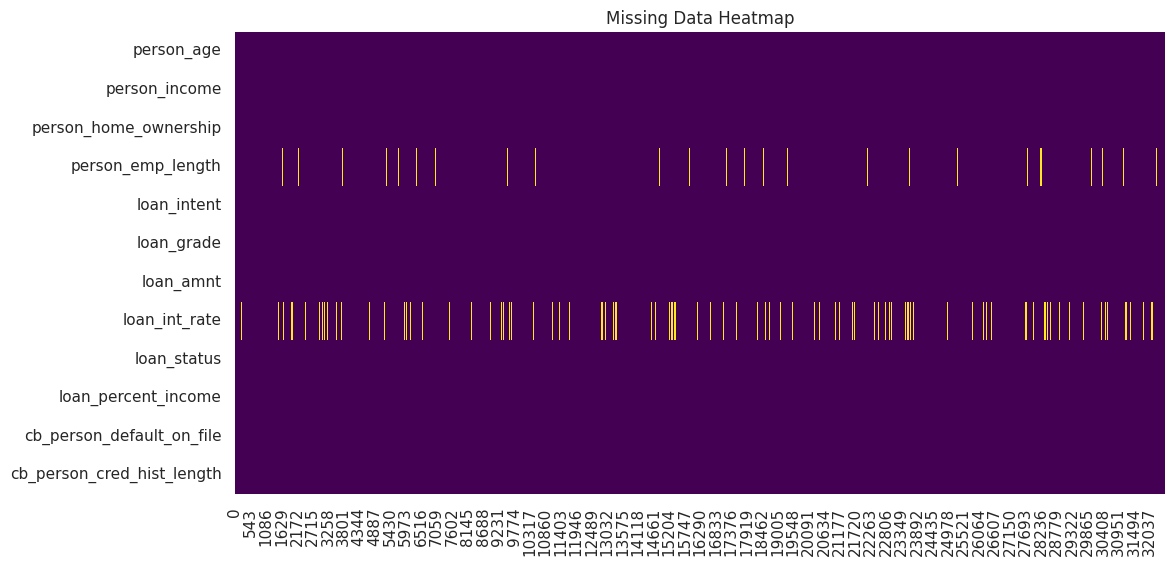

Missing values per column:
 loan_int_rate                 3116
person_emp_length              895
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [ ]:
#Step 3: Handle Missing Values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Visualize missing data
ax = plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


# Summary of missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_summary)

In [ ]:
# Step 4: Drop Rows with Missing Values
df_clean = df.dropna(axis=0).copy()





In [ ]:
# Step 5: Convert Object Columns to Category
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype('category')



In [ ]:
# Step 6: Encode Categorical Variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)



In [ ]:
# Final Check
print("Cleaned Dataset Shape:", df_encoded.shape)
print("Remaining Missing Values:", df_encoded.isnull().sum().sum())


Cleaned Dataset Shape: (28626, 403)
Remaining Missing Values: 0


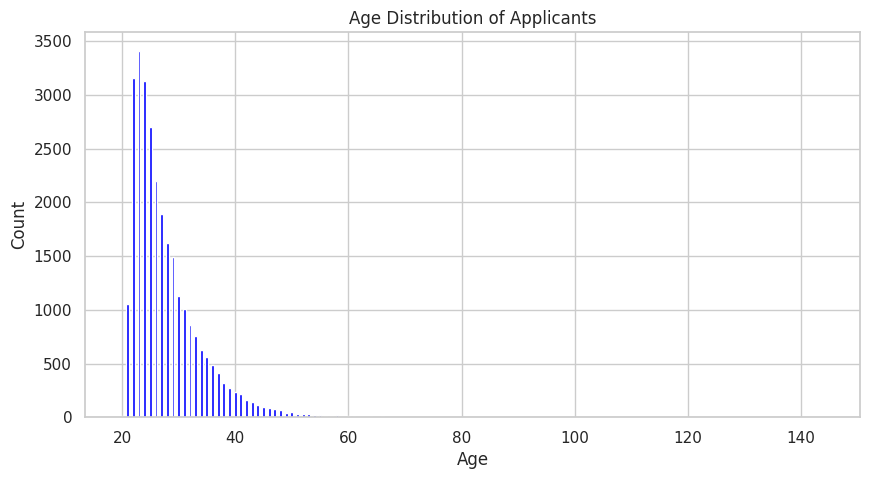

In [ ]:
#visualize initial age distribution of applicants
vertical = df_clean['person_age'].value_counts().values
horizontal = df_clean['person_age'].value_counts().index

fig = plt.figure(figsize=(10,5))

plt.bar(horizontal, vertical, color = 'blue', width = 0.5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Applicants")
plt.show()

In [ ]:
#adjust 'person_age' less than and equal to 90 years and 'person_emp_length' greater than 60 years
df_clean = df_clean.drop(df_clean[df_clean['person_age'] > 90].index, axis = 0)
df_clean['person_emp_length'] = pd.to_numeric(df_clean['person_emp_length'], errors='coerce').astype('Int64')
df_clean = df_clean.drop(df_clean[df_clean['person_emp_length'] > 60].index, axis=0)
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,95000,RENT,2,VENTURE,A,35000,7.9,1,0.37,N,2
1,26,108160,RENT,4,EDUCATION,E,35000,18.39,1,0.32,N,4
2,23,115000,RENT,2,EDUCATION,A,35000,7.9,0,0.30,N,4
3,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
4,23,120000,RENT,0,EDUCATION,A,35000,7.9,0,0.29,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32565,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32566,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32567,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# Convert 'person_emp_length' to nullable integer type to handle NaNs
df_clean['person_emp_length'] = pd.to_numeric(df_clean['person_emp_length'], errors='coerce').astype('Int64')

# Convert 'loan_int_rate' to numeric first, then to float
df_clean['loan_int_rate'] = pd.to_numeric(df_clean['loan_int_rate'], errors='coerce').astype(float)

In [ ]:
#Calculate loan to income, Loan to employment, and intrest rate to loan amt ratios
df_clean['Loan_to_income_Ratio'] = df_clean['loan_amnt'] / df_clean['person_income']
df_clean['Loan_to_emp_length_ratio'] = df_clean['person_emp_length'] / df_clean['loan_amnt']
df_clean['int_rate_to_loan_amnt_ratio'] = df_clean['loan_int_rate'] / df_clean['loan_amnt']
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
0,23,95000,RENT,2,VENTURE,A,35000,7.90,1,0.37,N,2,0.368421,0.000057,0.000226
1,26,108160,RENT,4,EDUCATION,E,35000,18.39,1,0.32,N,4,0.323595,0.000114,0.000525
2,23,115000,RENT,2,EDUCATION,A,35000,7.90,0,0.30,N,4,0.304348,0.000057,0.000226
3,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,0.060000,0.000233,0.000355
4,23,120000,RENT,0,EDUCATION,A,35000,7.90,0,0.29,N,4,0.291667,0.0,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30,0.109434,0.000172,0.002269
32565,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19,0.146875,0.000227,0.000425
32566,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0.460526,0.000086,0.000314
32567,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26,0.100000,0.000333,0.000765


visualizations


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm


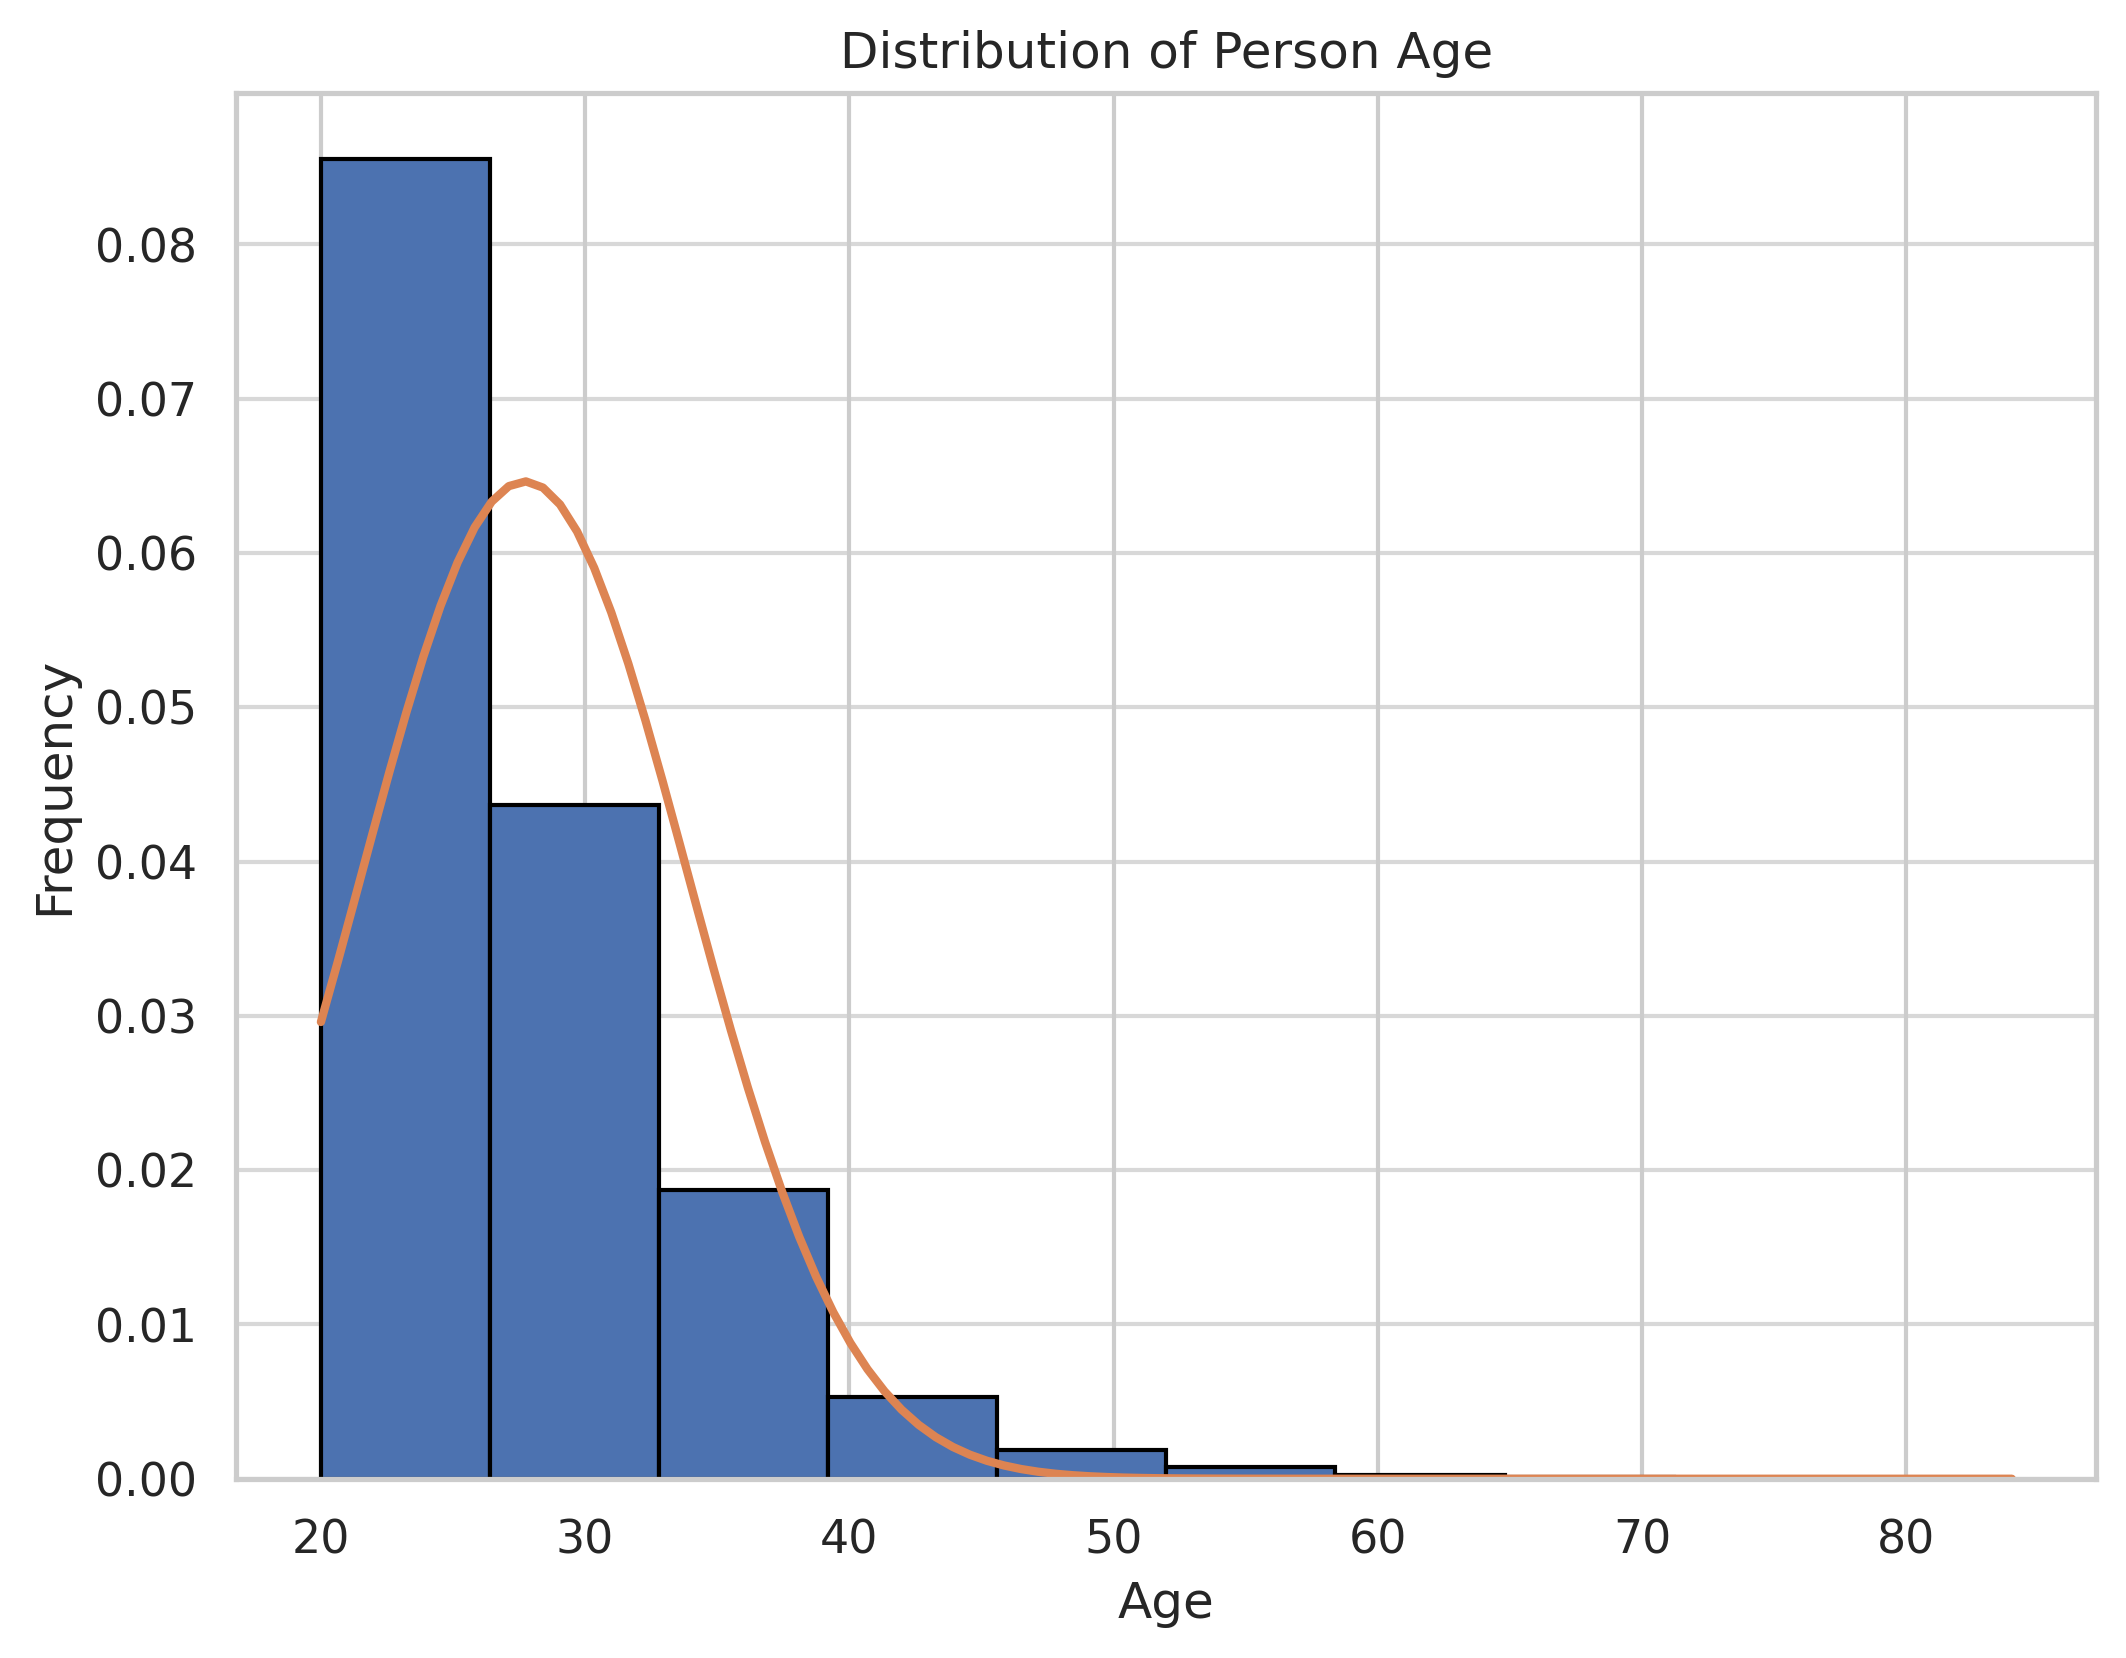

In [ ]:
# Histogram for person_age

mean = df_clean['person_age'].mean()
std = df_clean['person_age'].std()

xmin, xmax = df_clean['person_age'].min(), df_clean['person_age'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['person_age'], bins=10, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Person Age")
plt.grid(axis='y', alpha=0.75)
plt.show()

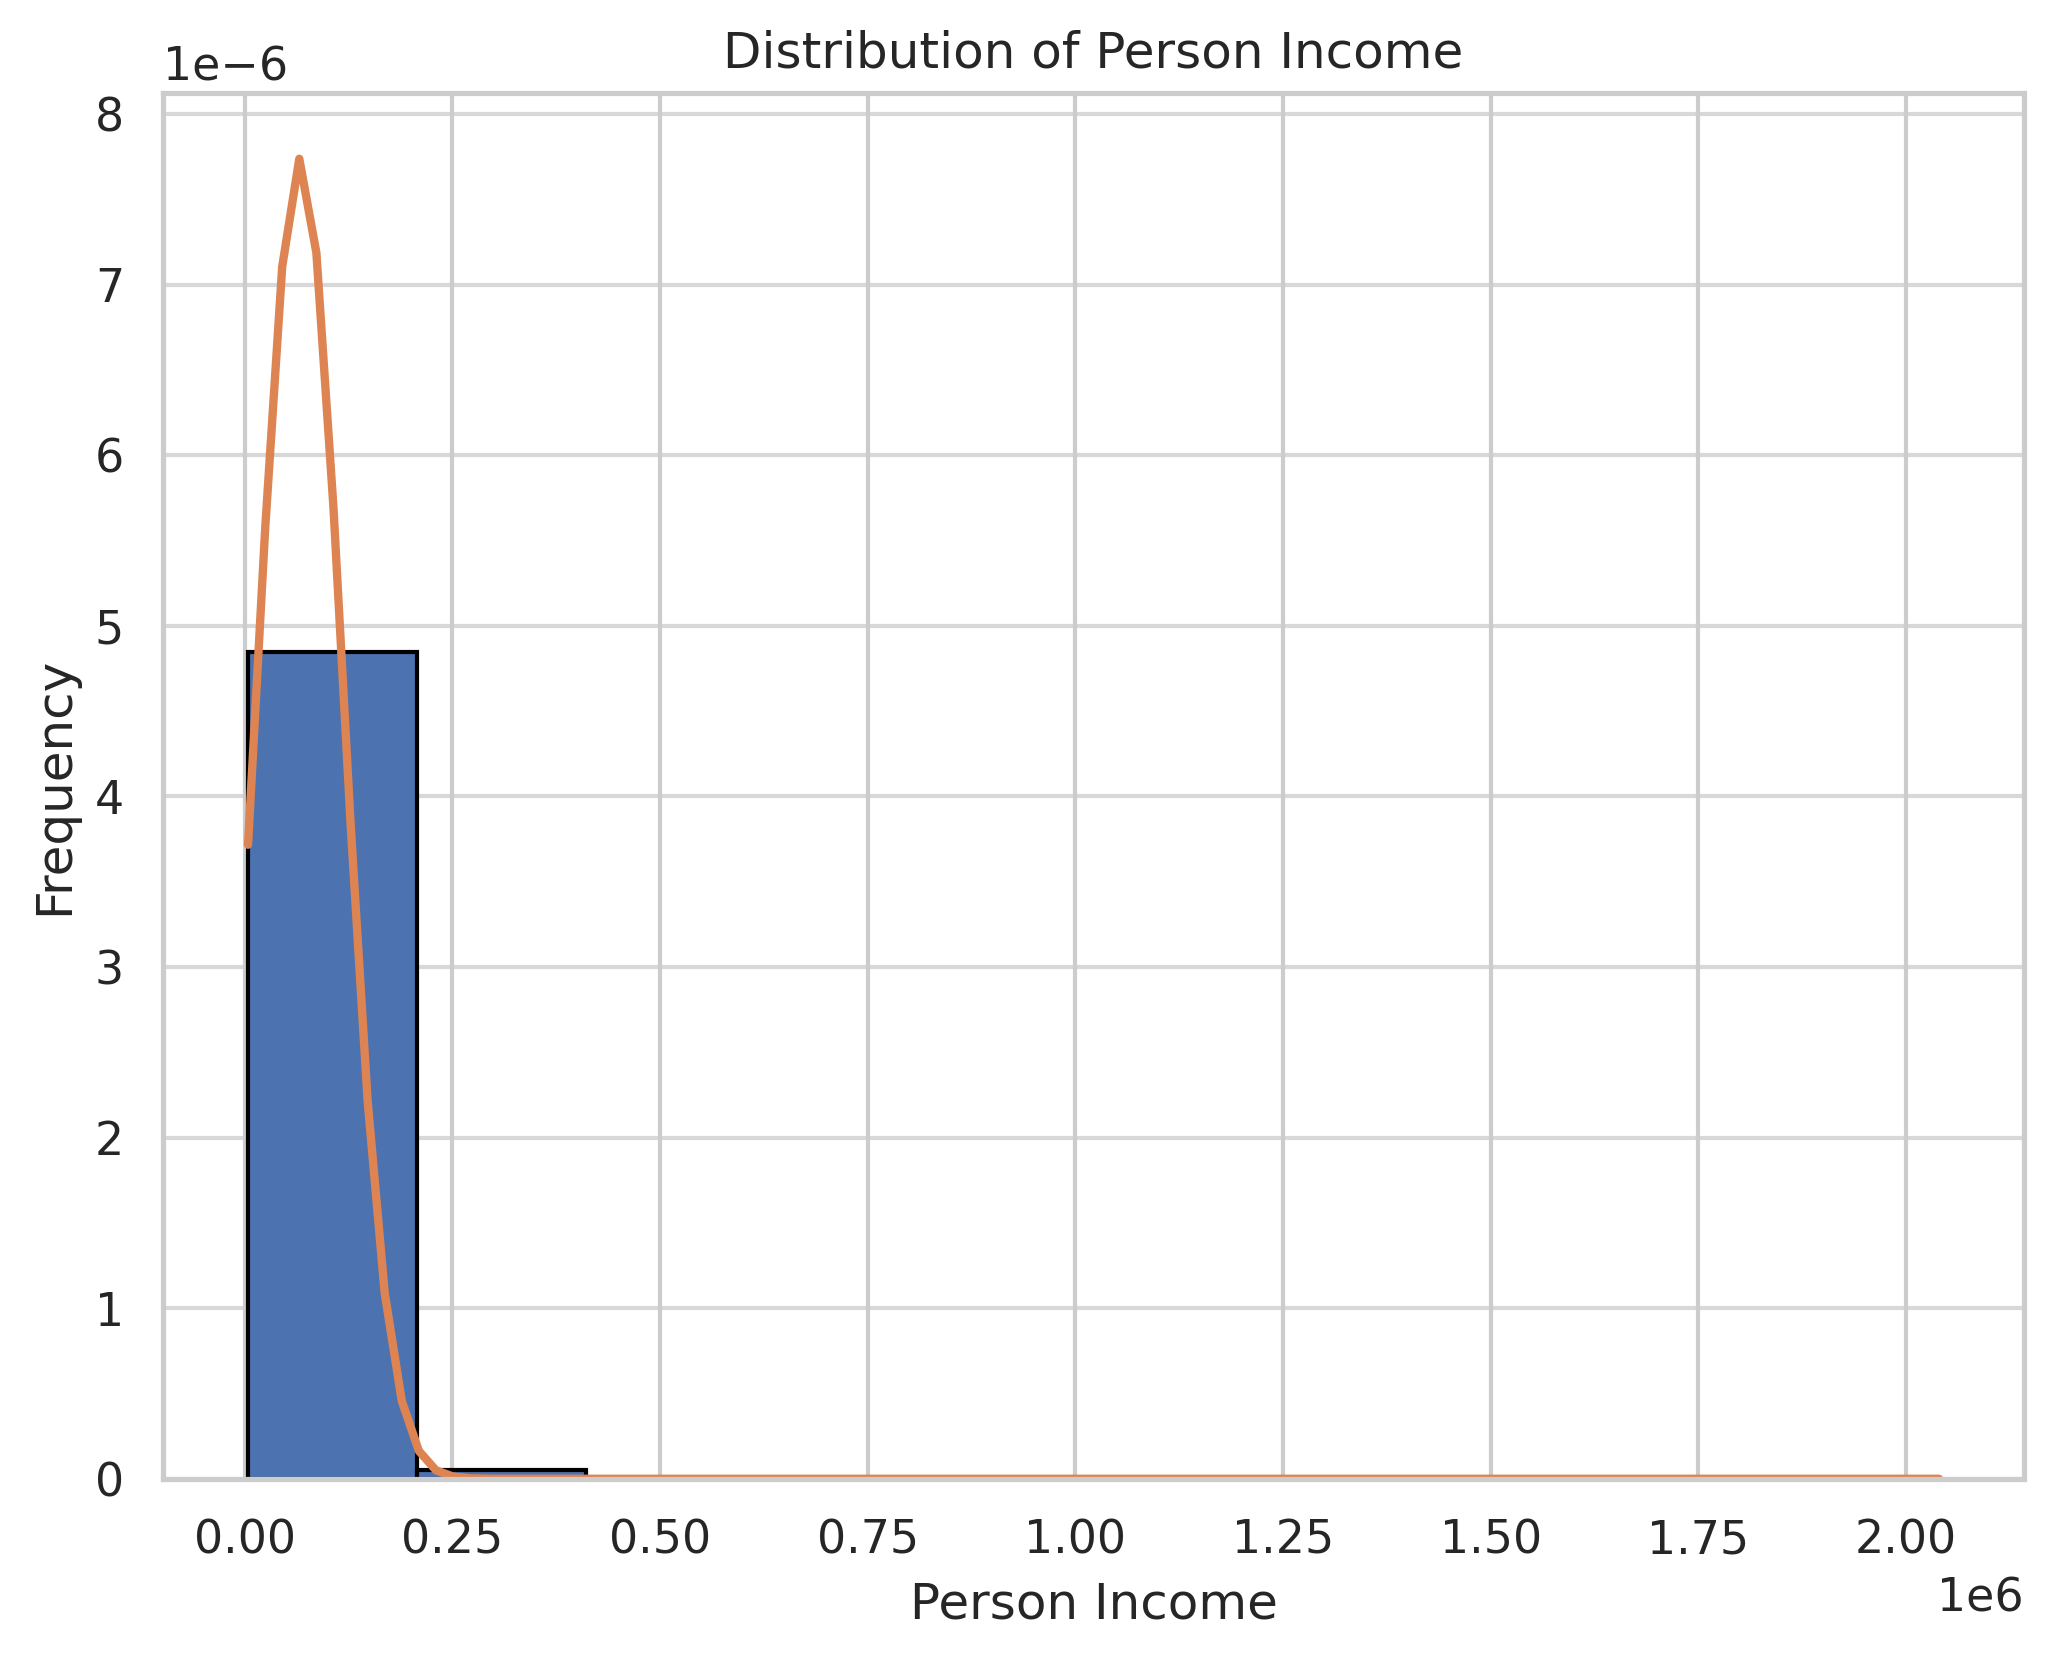

In [ ]:
#Histogram for person_income
mean = df_clean['person_income'].mean()
std = df_clean['person_income'].std()

xmin, xmax = df_clean['person_income'].min(), df_clean['person_income'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['person_income'], bins=10, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Person Income")
plt.ylabel("Frequency")
plt.title("Distribution of Person Income")
plt.grid(axis='y', alpha=0.75)
plt.show()

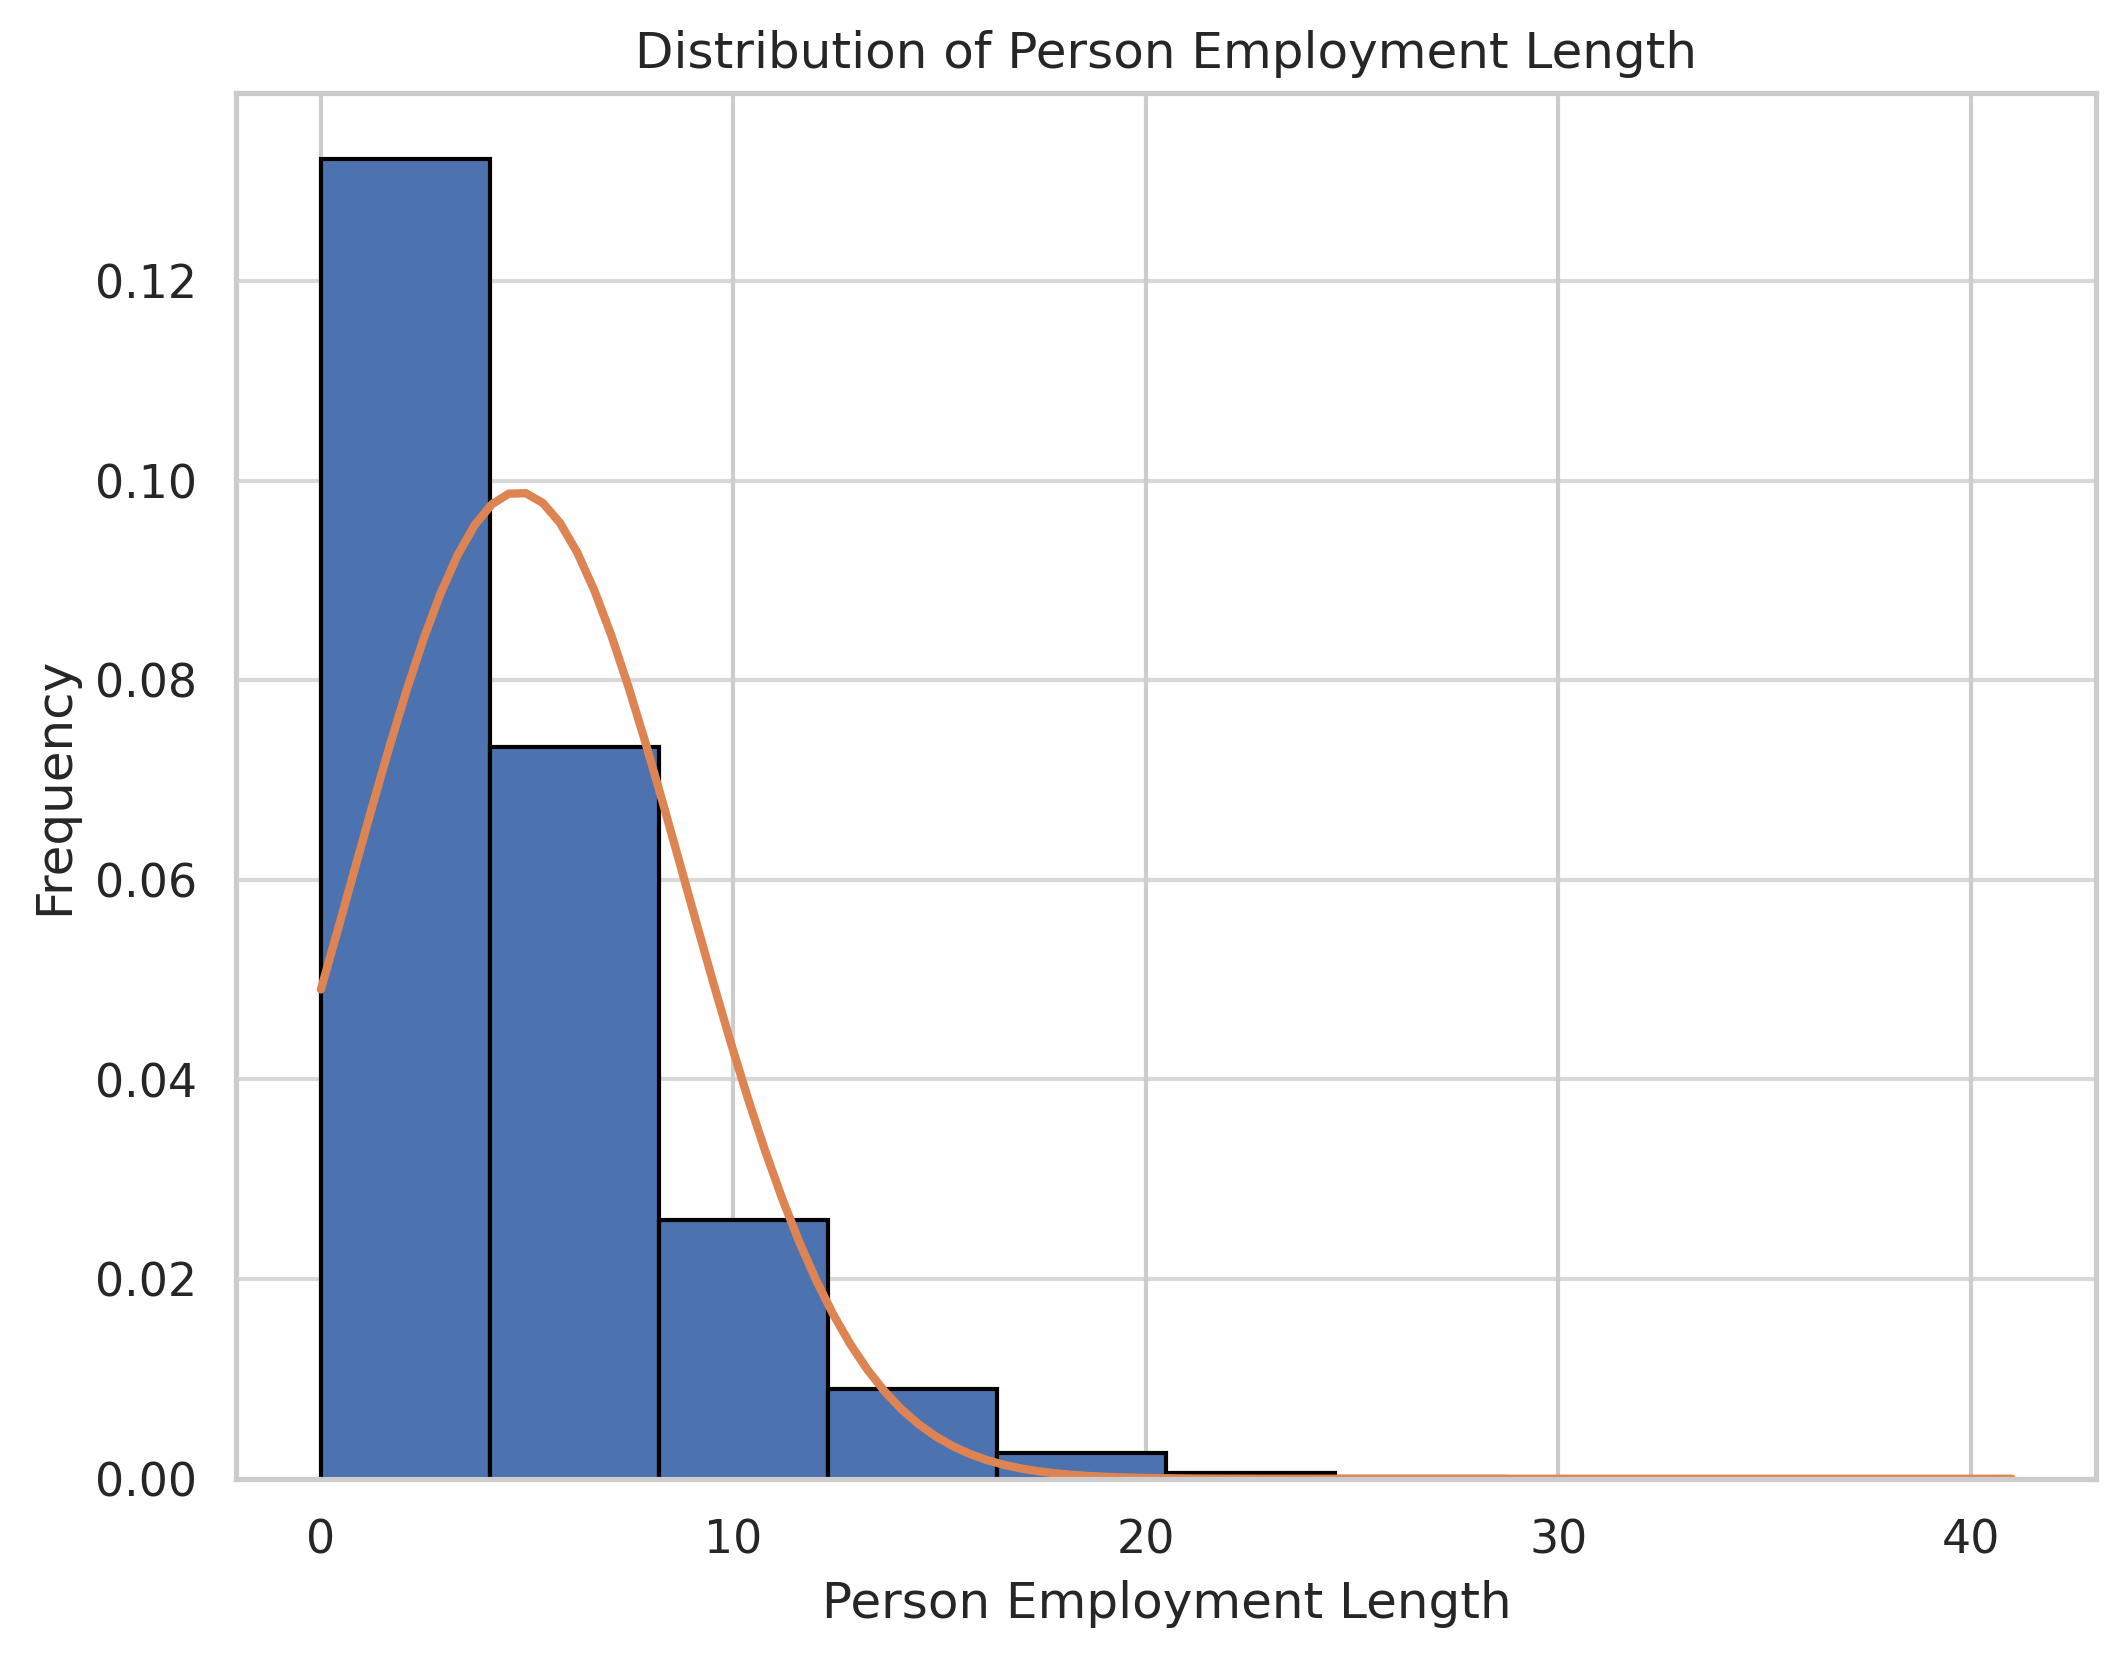

In [ ]:
# Histogram for person_emp_length
mean = df_clean['person_emp_length'].mean()
std = df_clean['person_emp_length'].std()

xmin, xmax = df_clean['person_emp_length'].min(), df_clean['person_emp_length'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)


plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['person_emp_length'], bins=10, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Person Employment Length")
plt.ylabel("Frequency")
plt.title("Distribution of Person Employment Length")
plt.grid(axis='y', alpha=0.75)
plt.show()

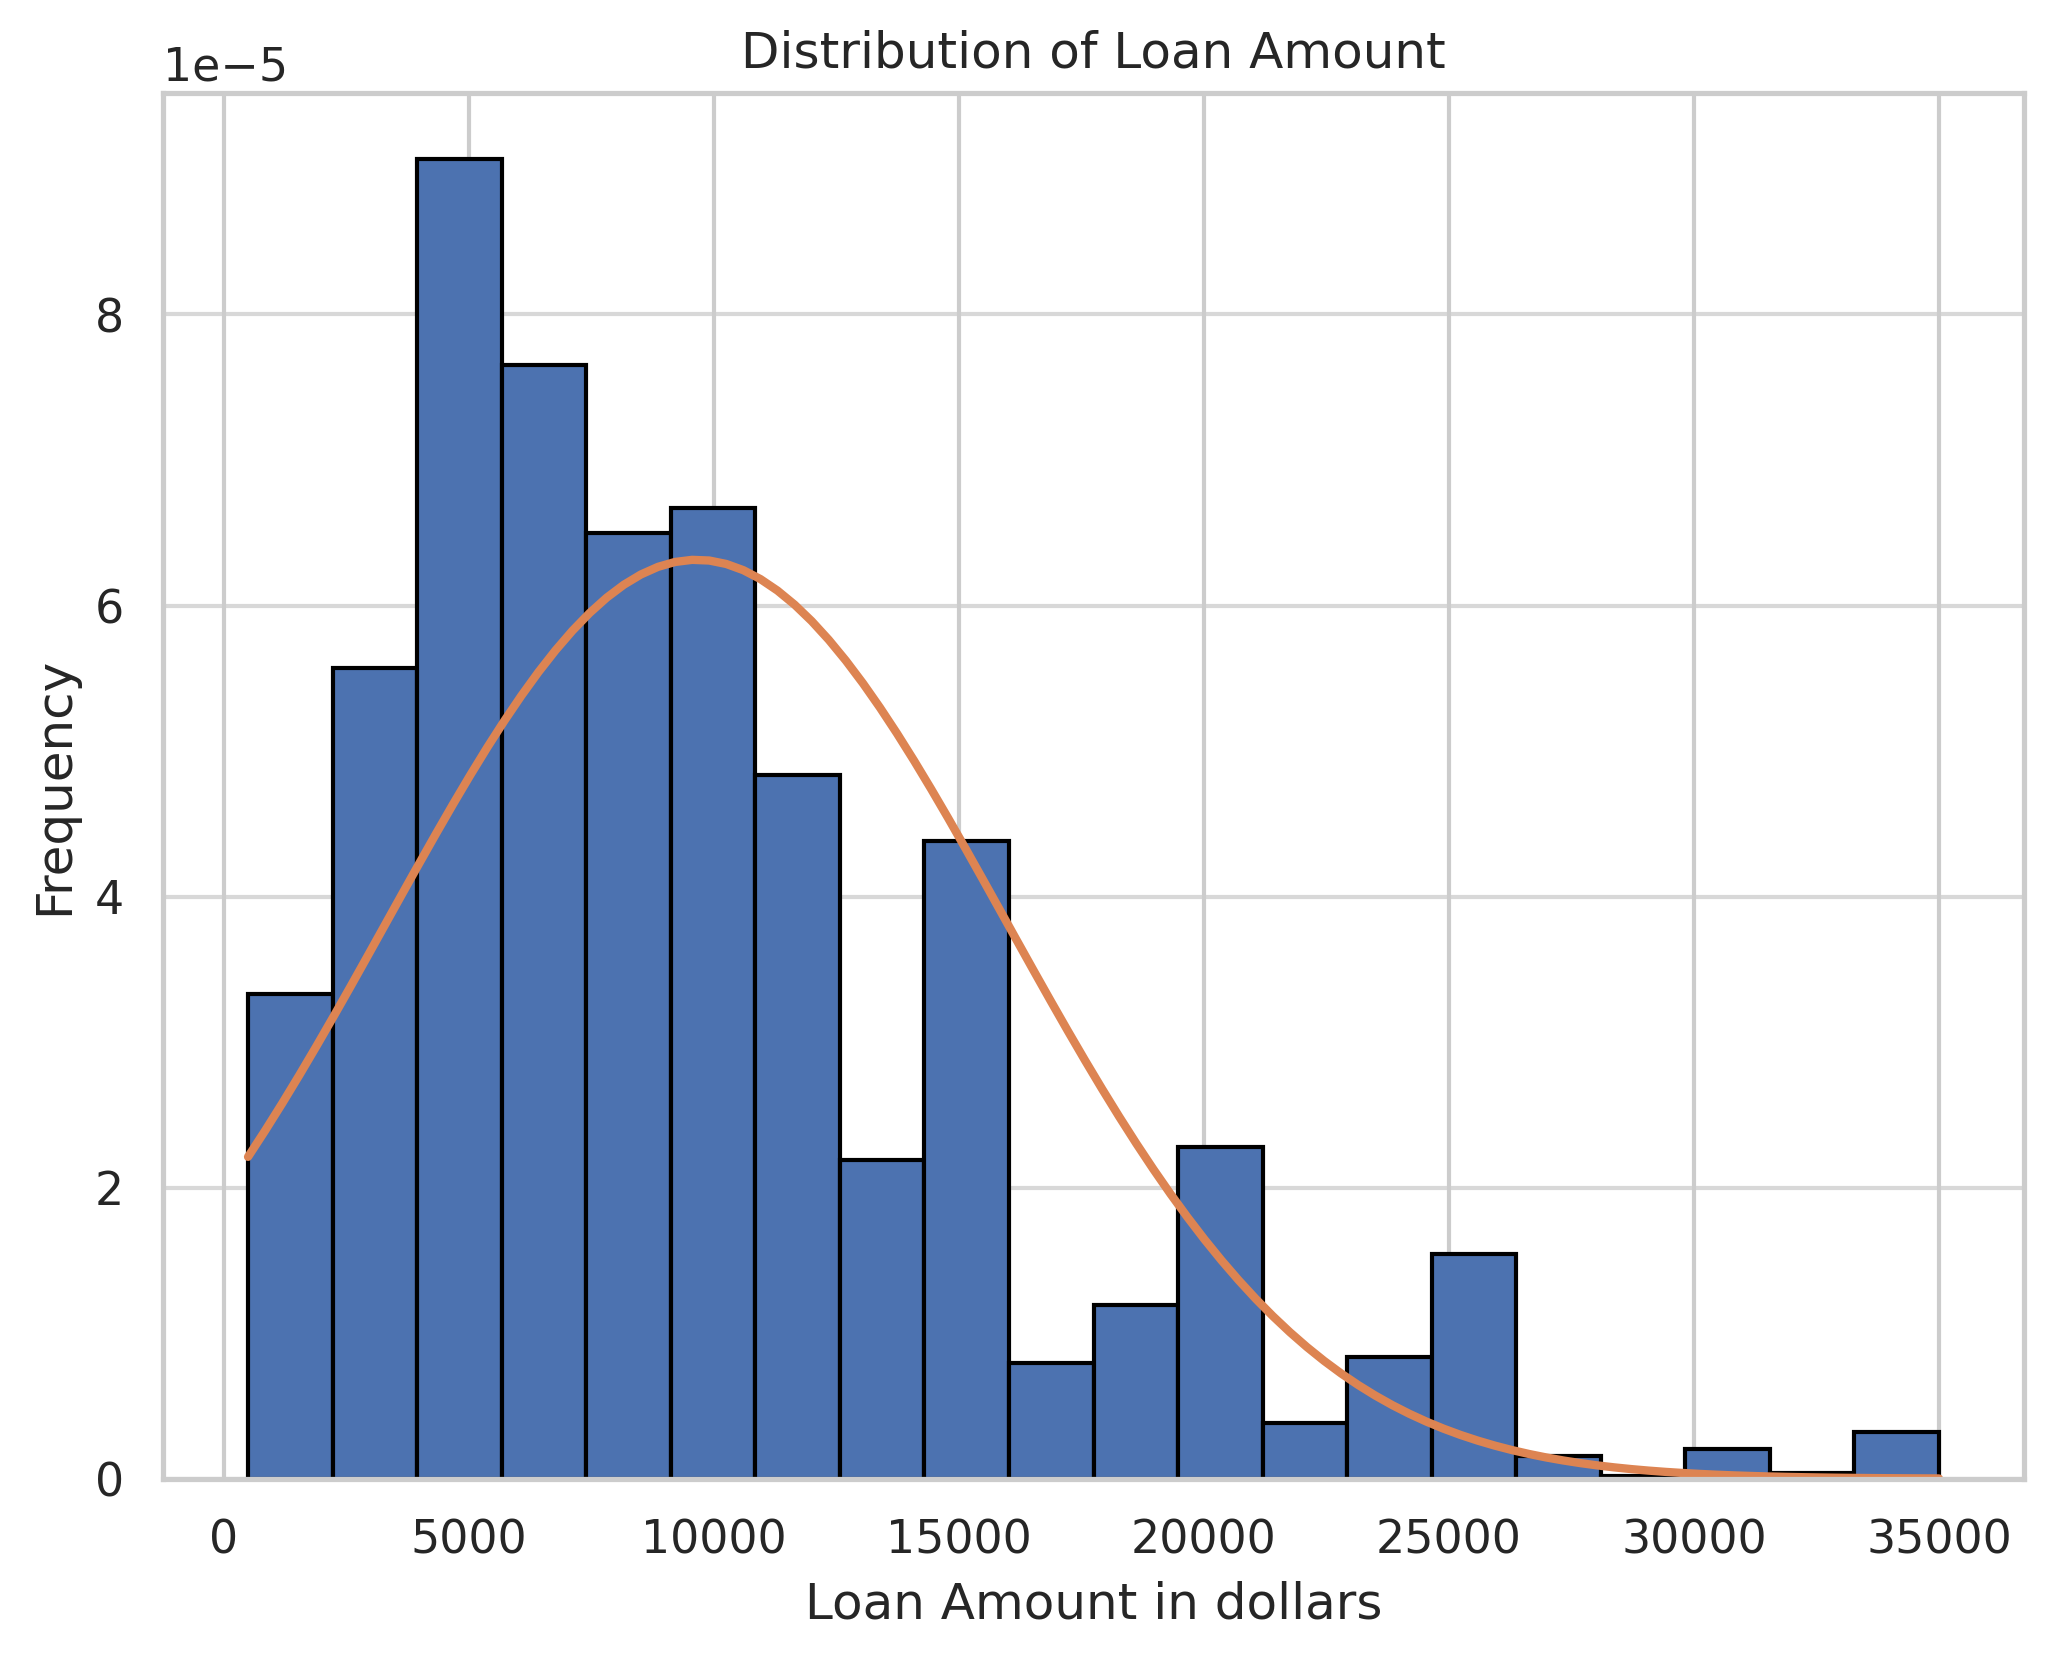

In [ ]:
# Histogram for loan_amnt
mean = df_clean['loan_amnt'].mean()
std = df_clean['loan_amnt'].std()

xmin, xmax = df_clean['loan_amnt'].min(), df_clean['loan_amnt'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['loan_amnt'], bins=20, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Loan Amount in dollars")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amount")
plt.grid(axis='y', alpha=0.75)
plt.show()

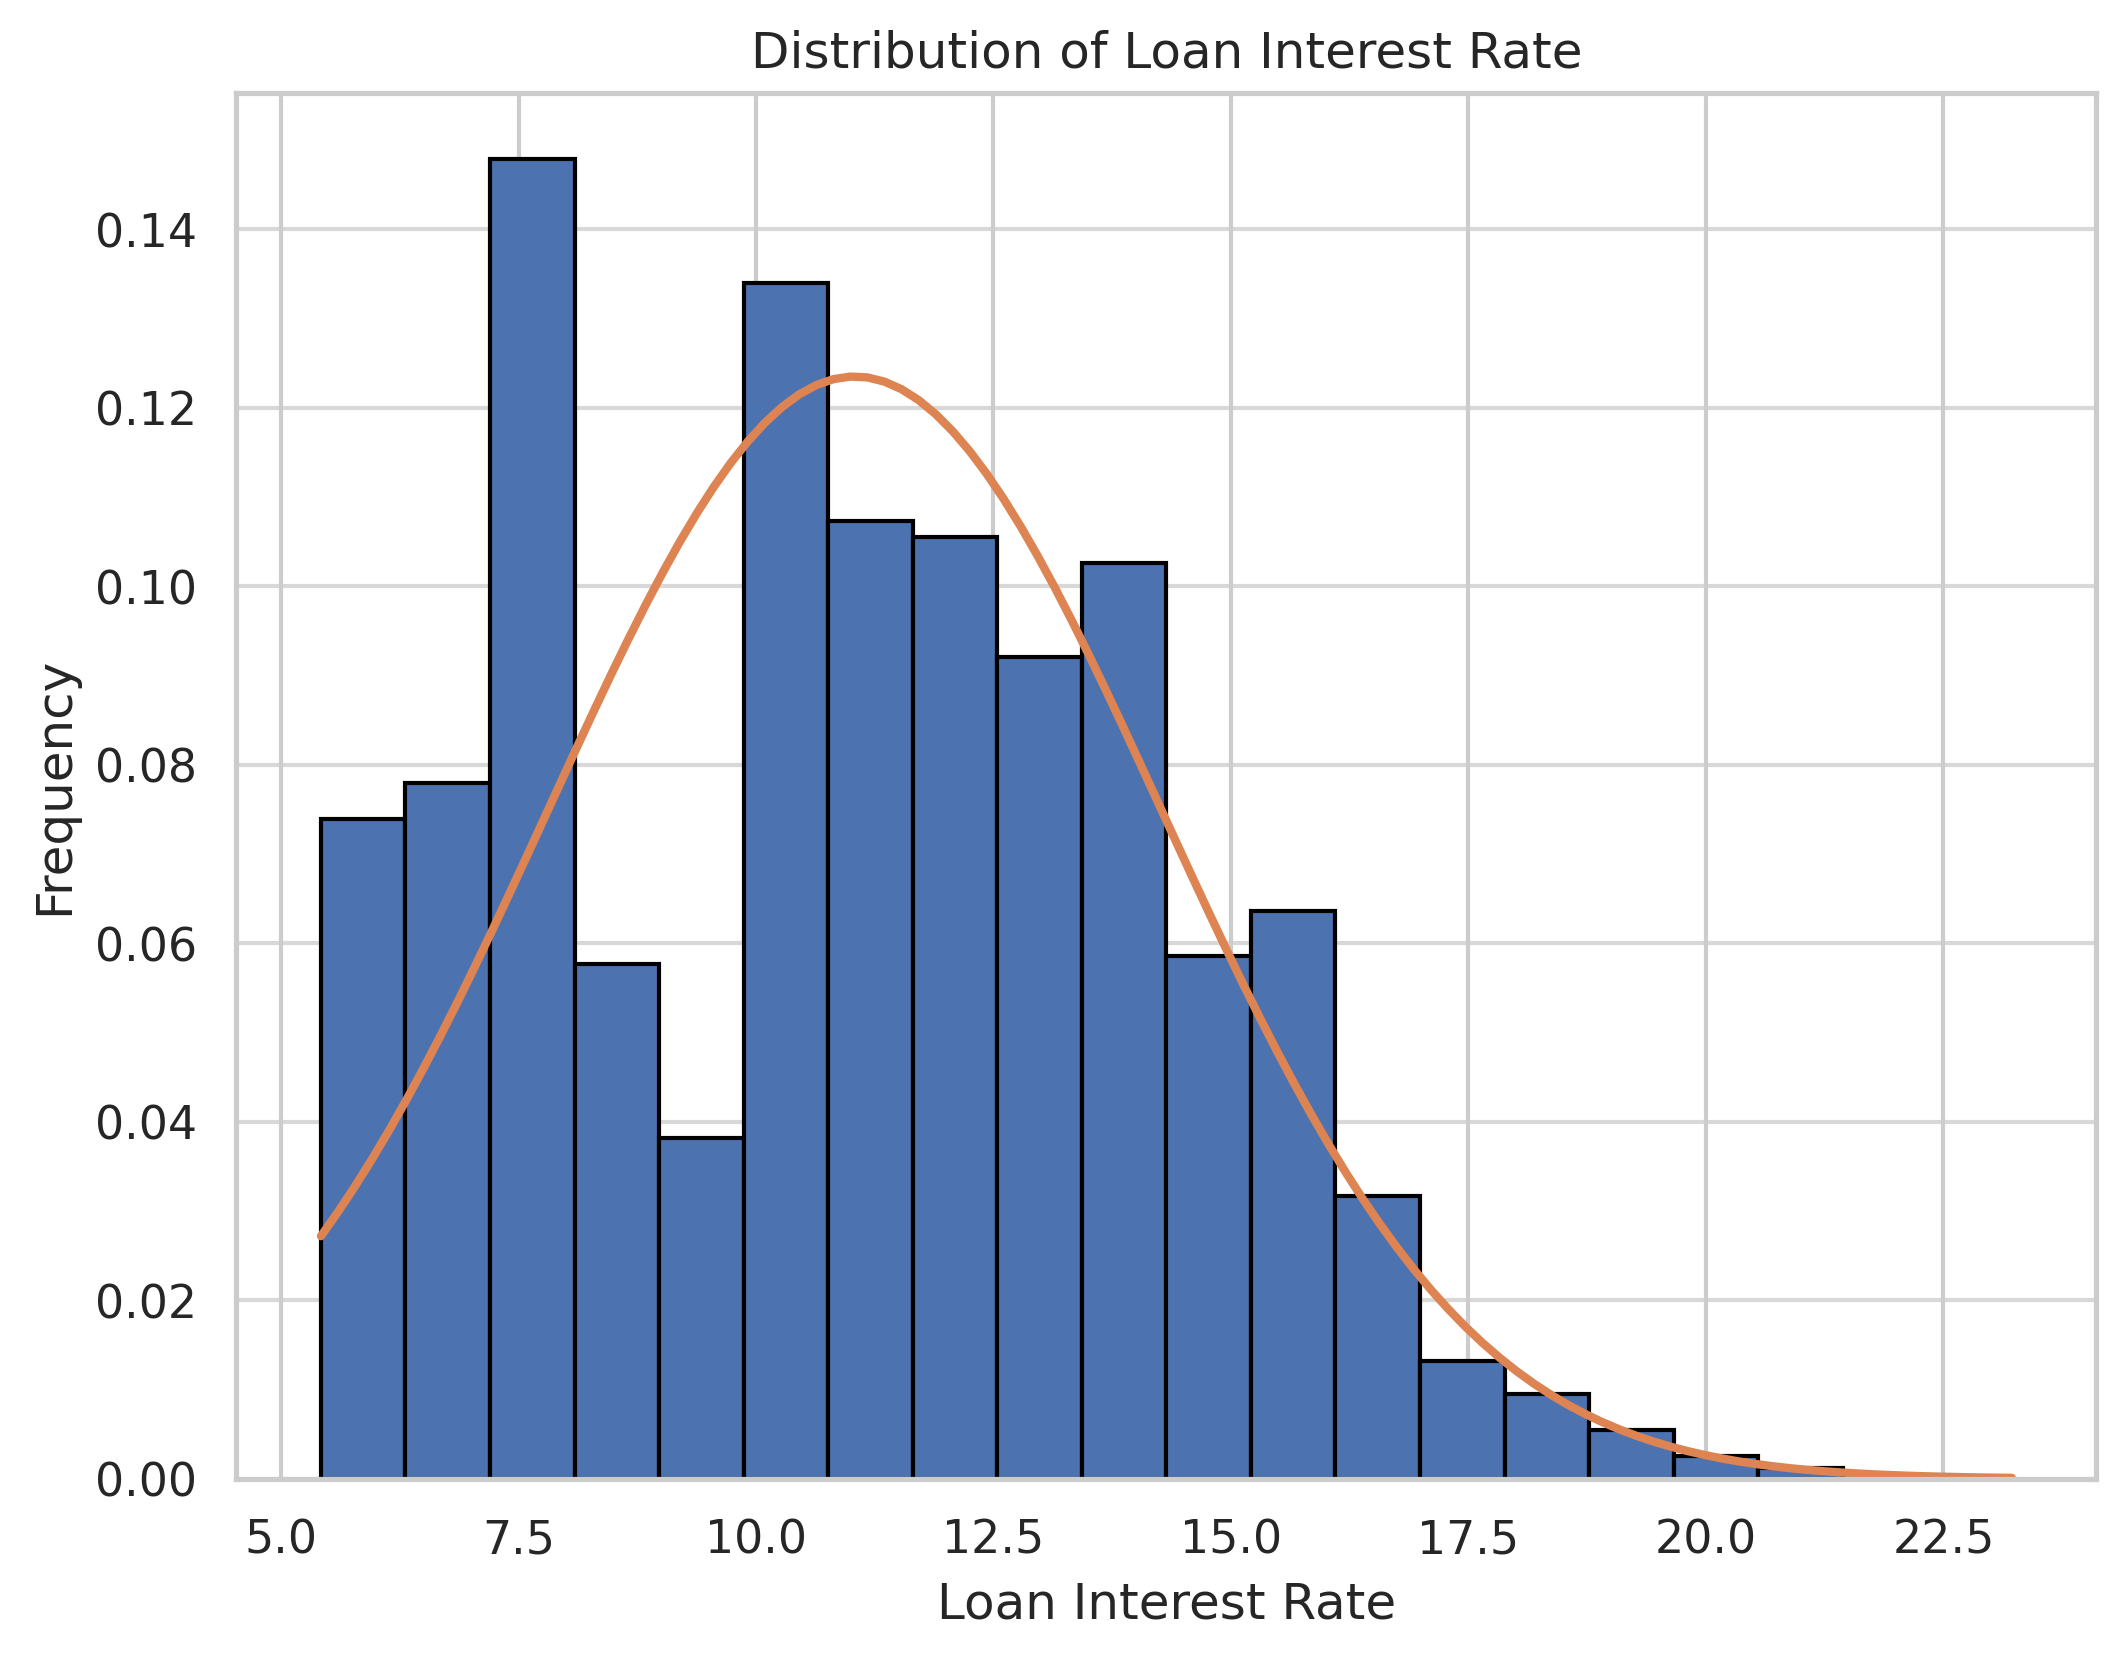

In [ ]:
# Histogram for loan_int_rate
mean = df_clean['loan_int_rate'].mean()
std = df_clean['loan_int_rate'].std()

xmin, xmax = df_clean['loan_int_rate'].min(), df_clean['loan_int_rate'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['loan_int_rate'], bins=20, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Loan Interest Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Interest Rate")
plt.grid(axis='y', alpha=0.75)
plt.show()

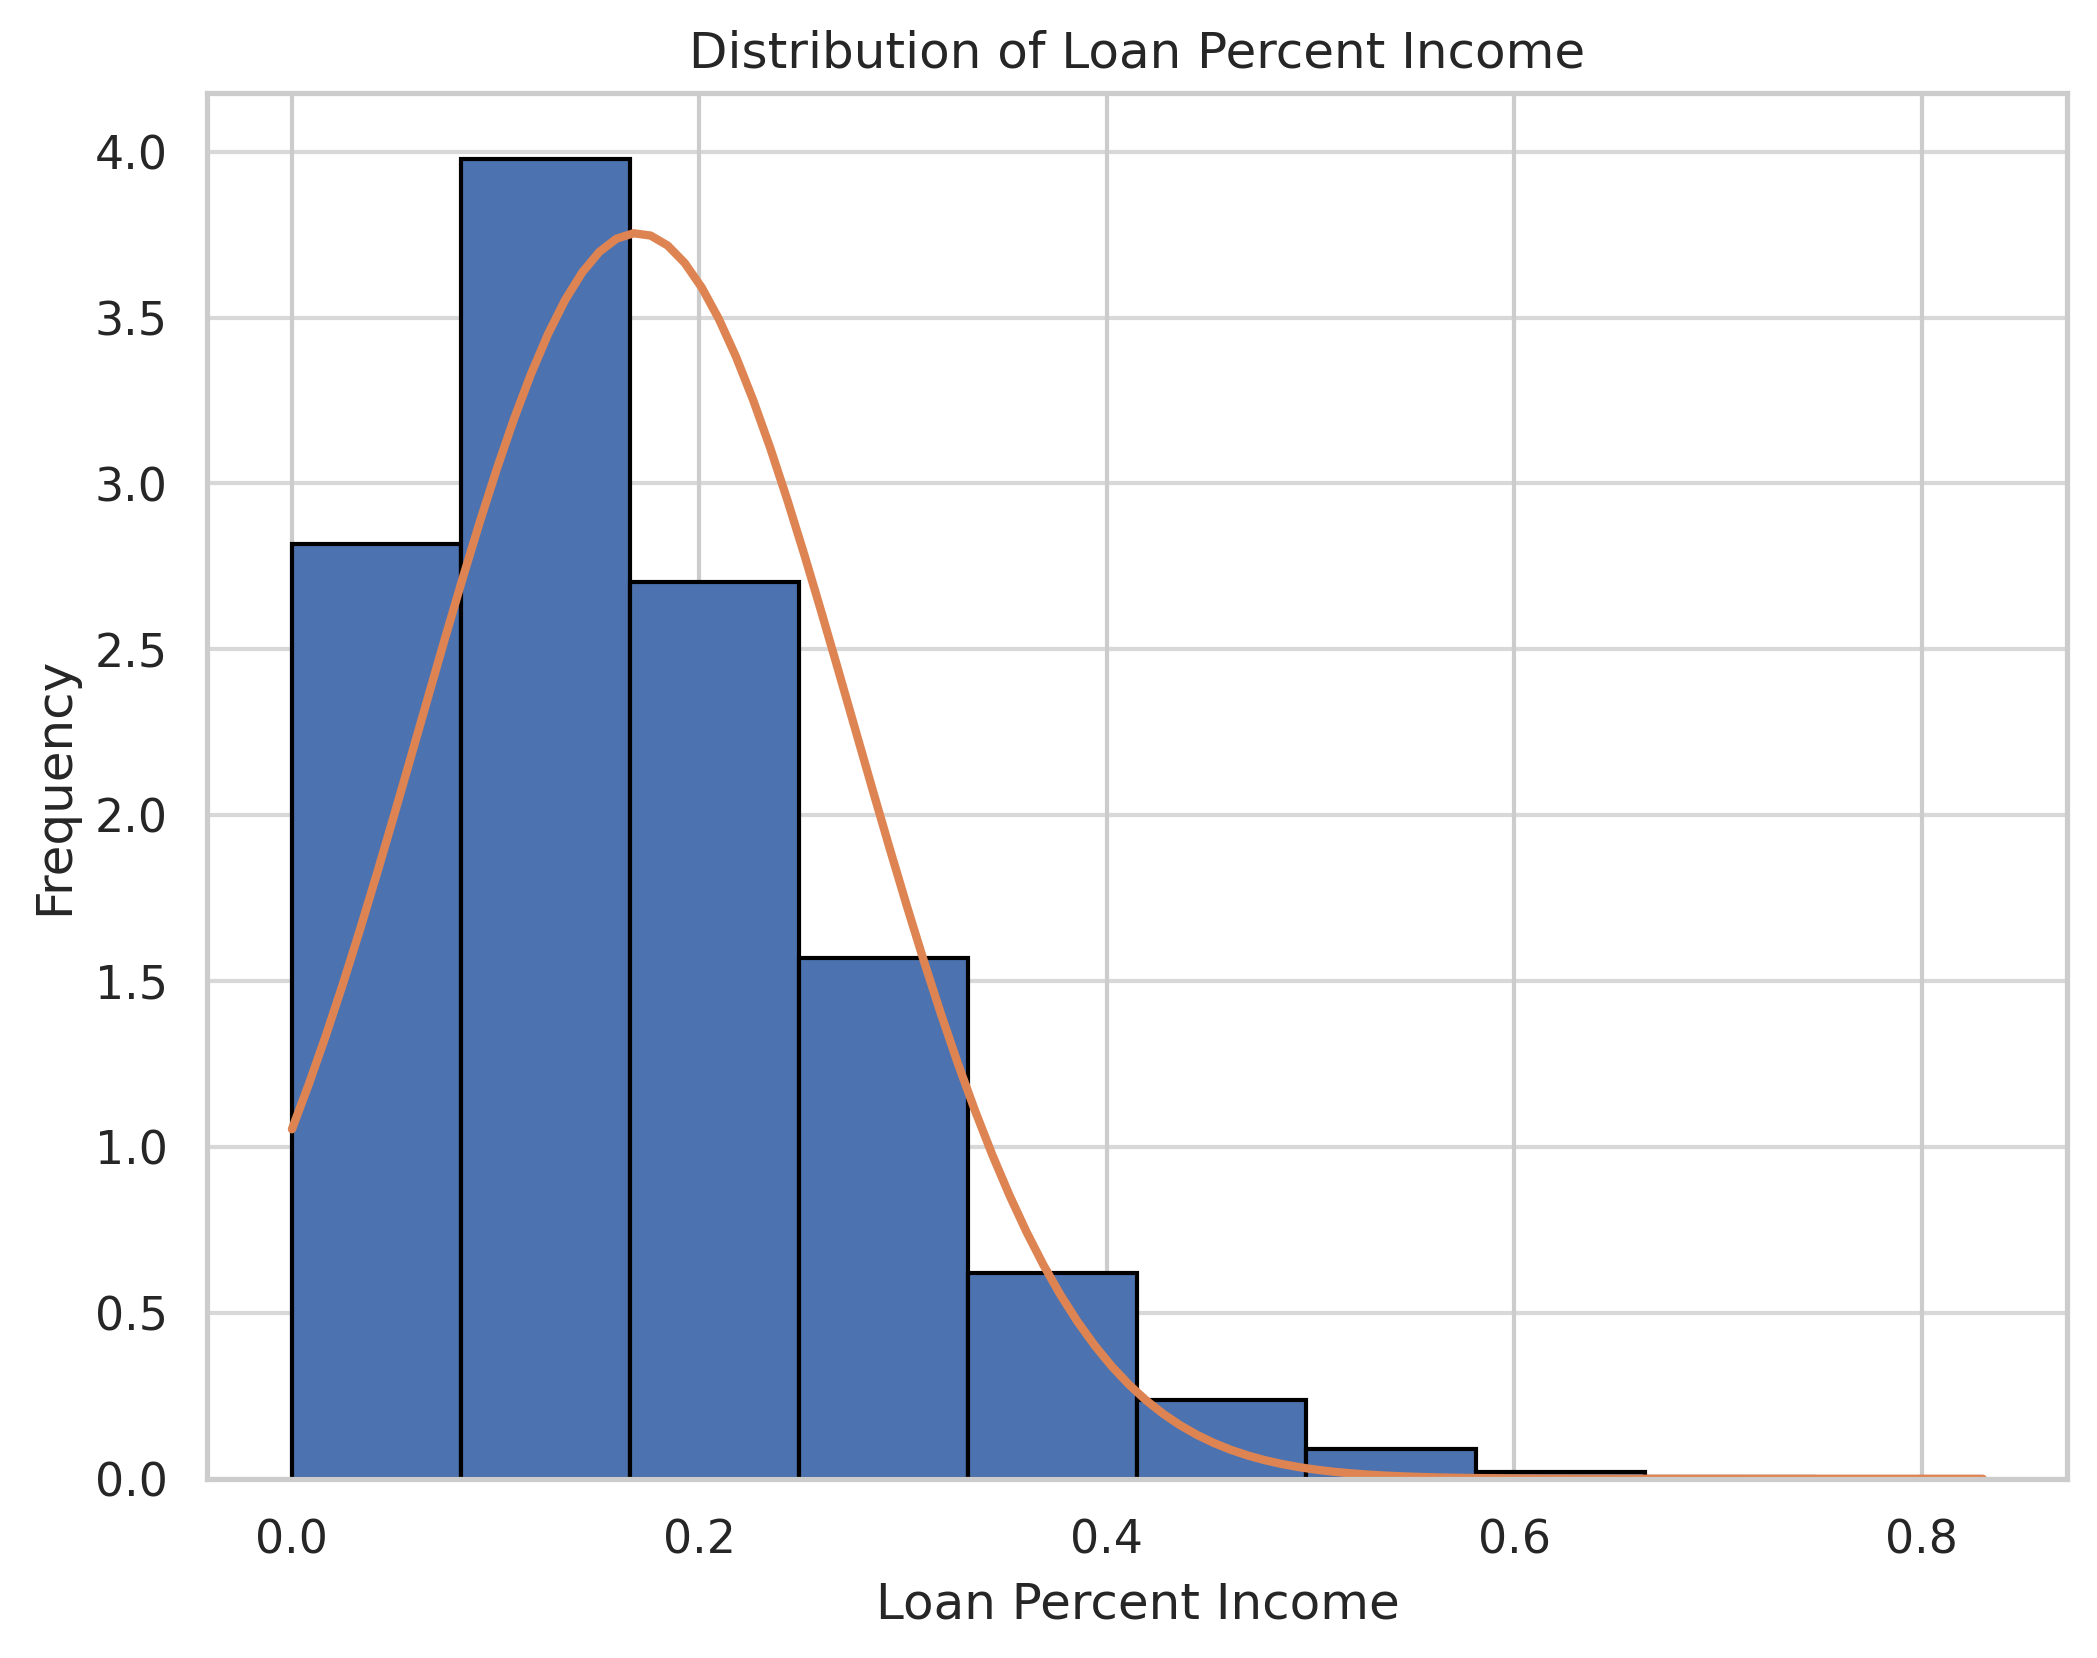

In [ ]:
# Histogram for loan_percent_income
mean = df_clean['loan_percent_income'].mean()
std = df_clean['loan_percent_income'].std()

xmin, xmax = df_clean['loan_percent_income'].min(), df_clean['loan_percent_income'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['loan_percent_income'], bins=10, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Loan Percent Income")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Percent Income")
plt.grid(axis='y', alpha=0.75)
plt.show()

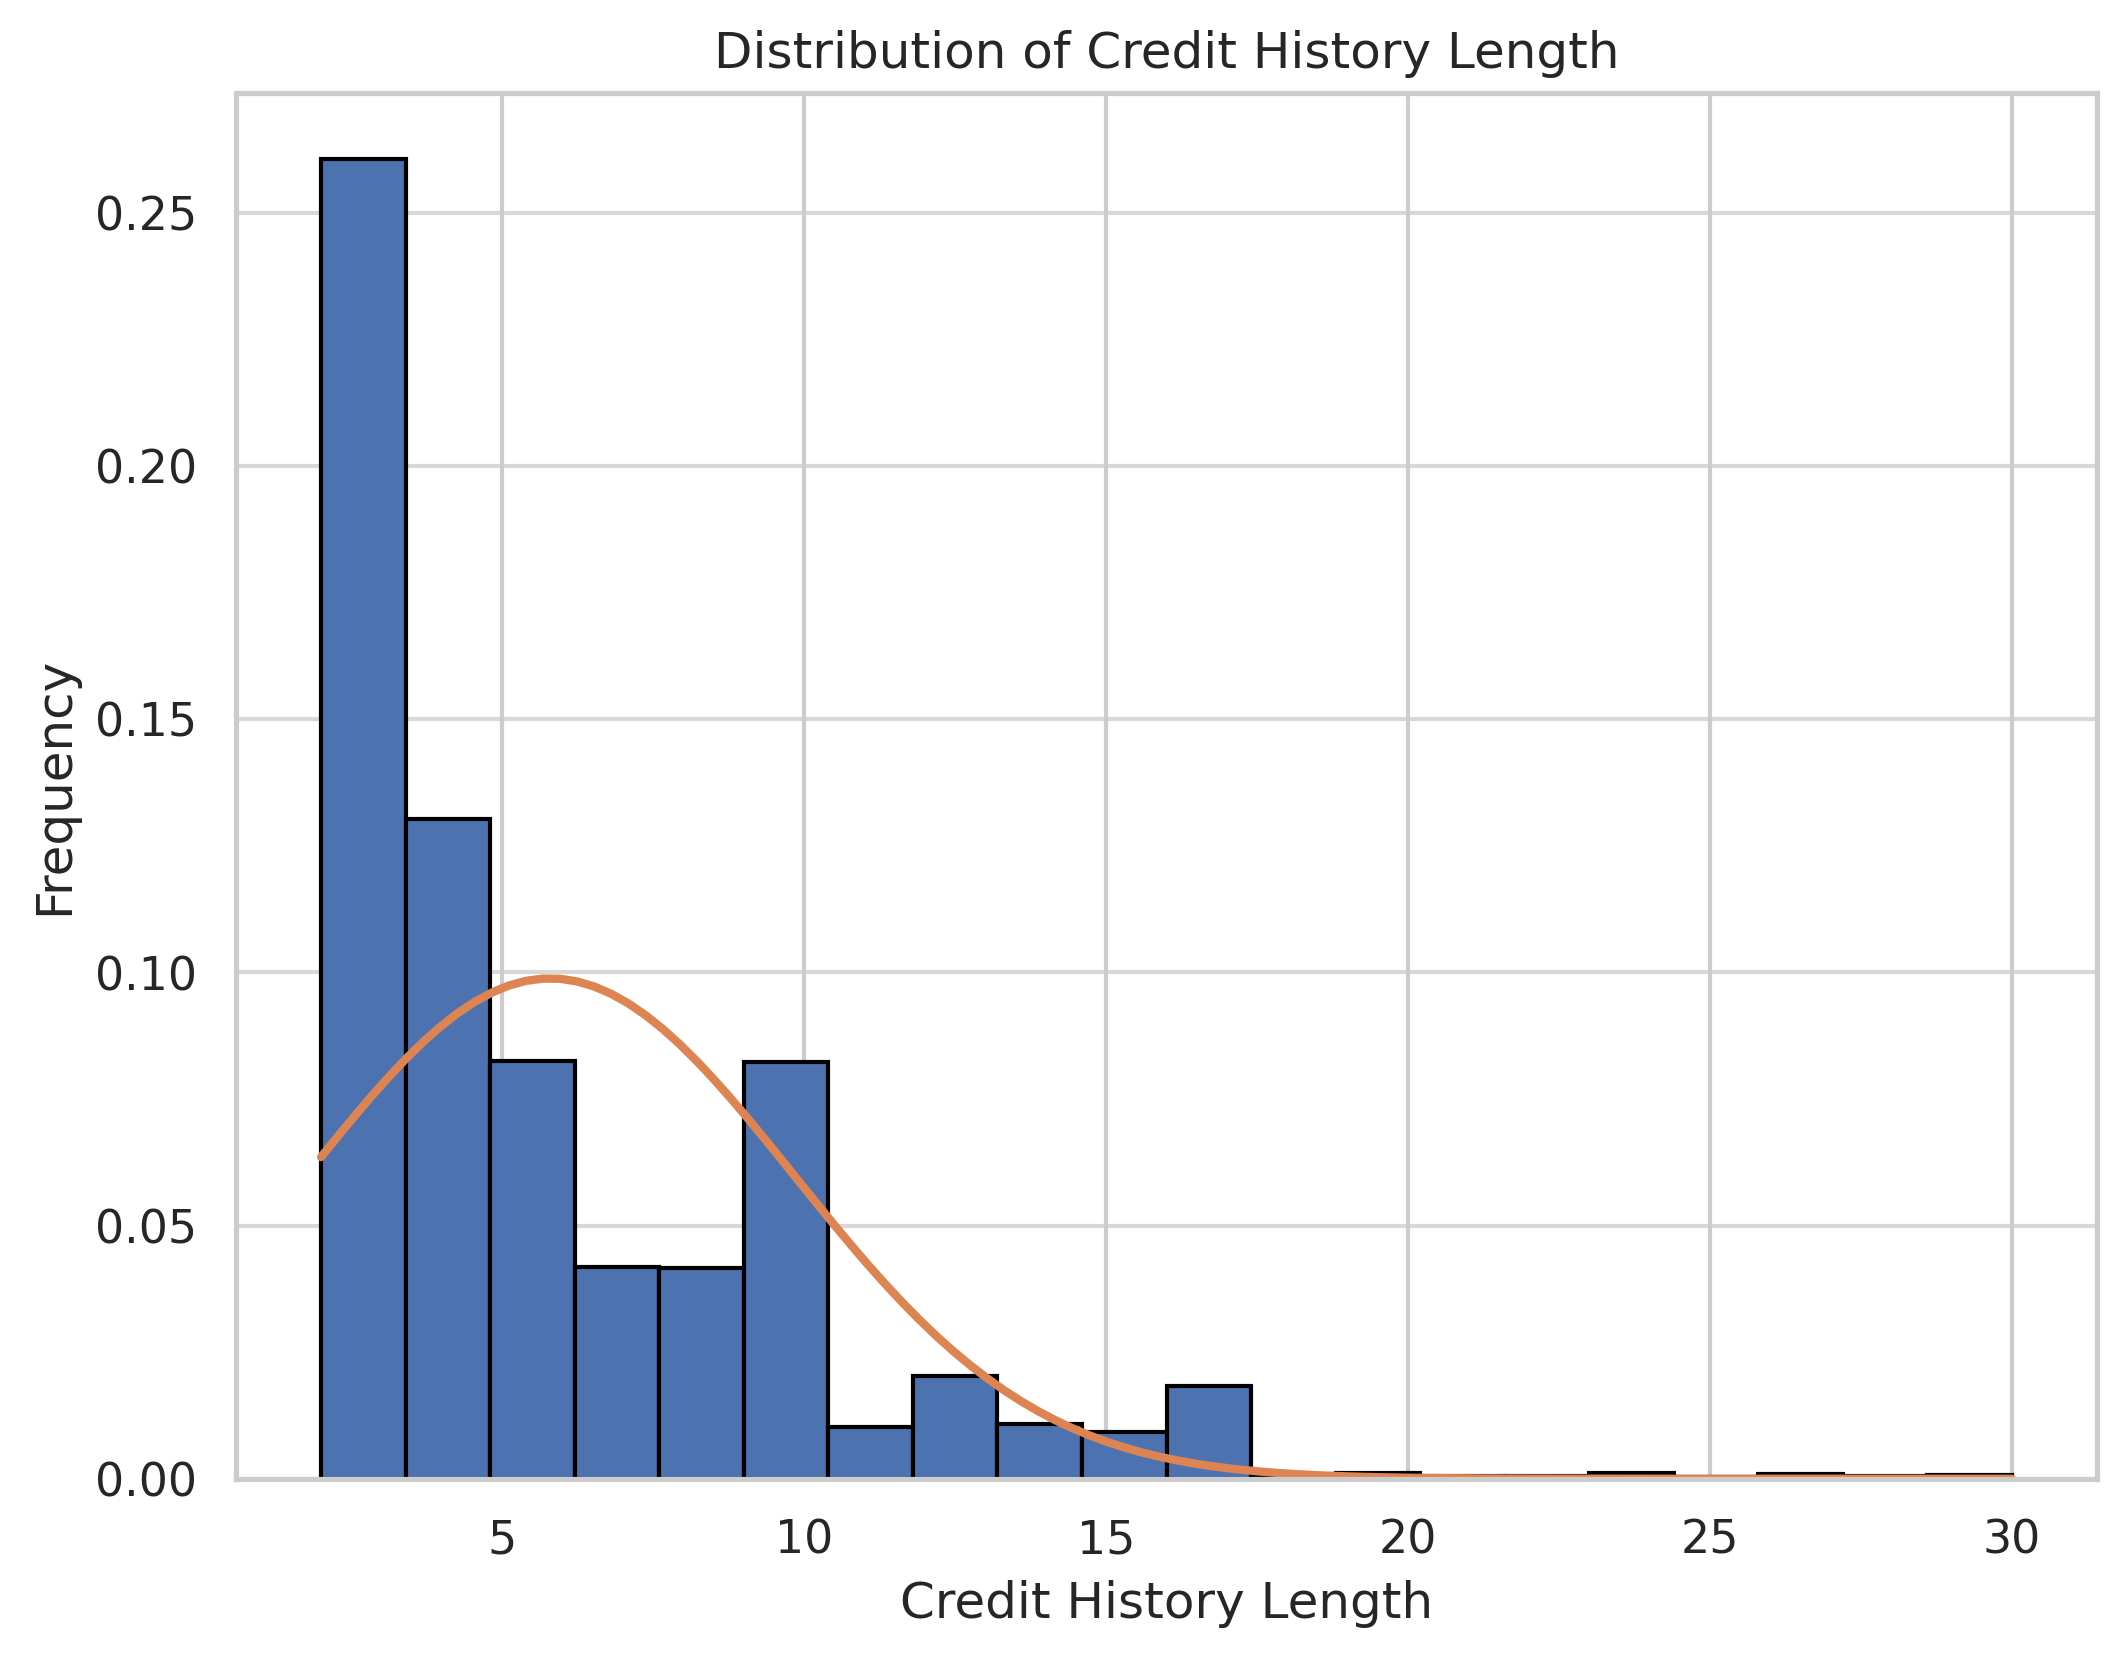

In [ ]:
# Histogram for cb_person_cred_hist_length
mean = df_clean['cb_person_cred_hist_length'].mean()
std = df_clean['cb_person_cred_hist_length'].std()

xmin, xmax = df_clean['cb_person_cred_hist_length'].min(), df_clean['cb_person_cred_hist_length'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['cb_person_cred_hist_length'], bins=20, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Credit History Length")
plt.ylabel("Frequency")
plt.title("Distribution of Credit History Length")
plt.grid(axis='y', alpha=0.75)
plt.show()

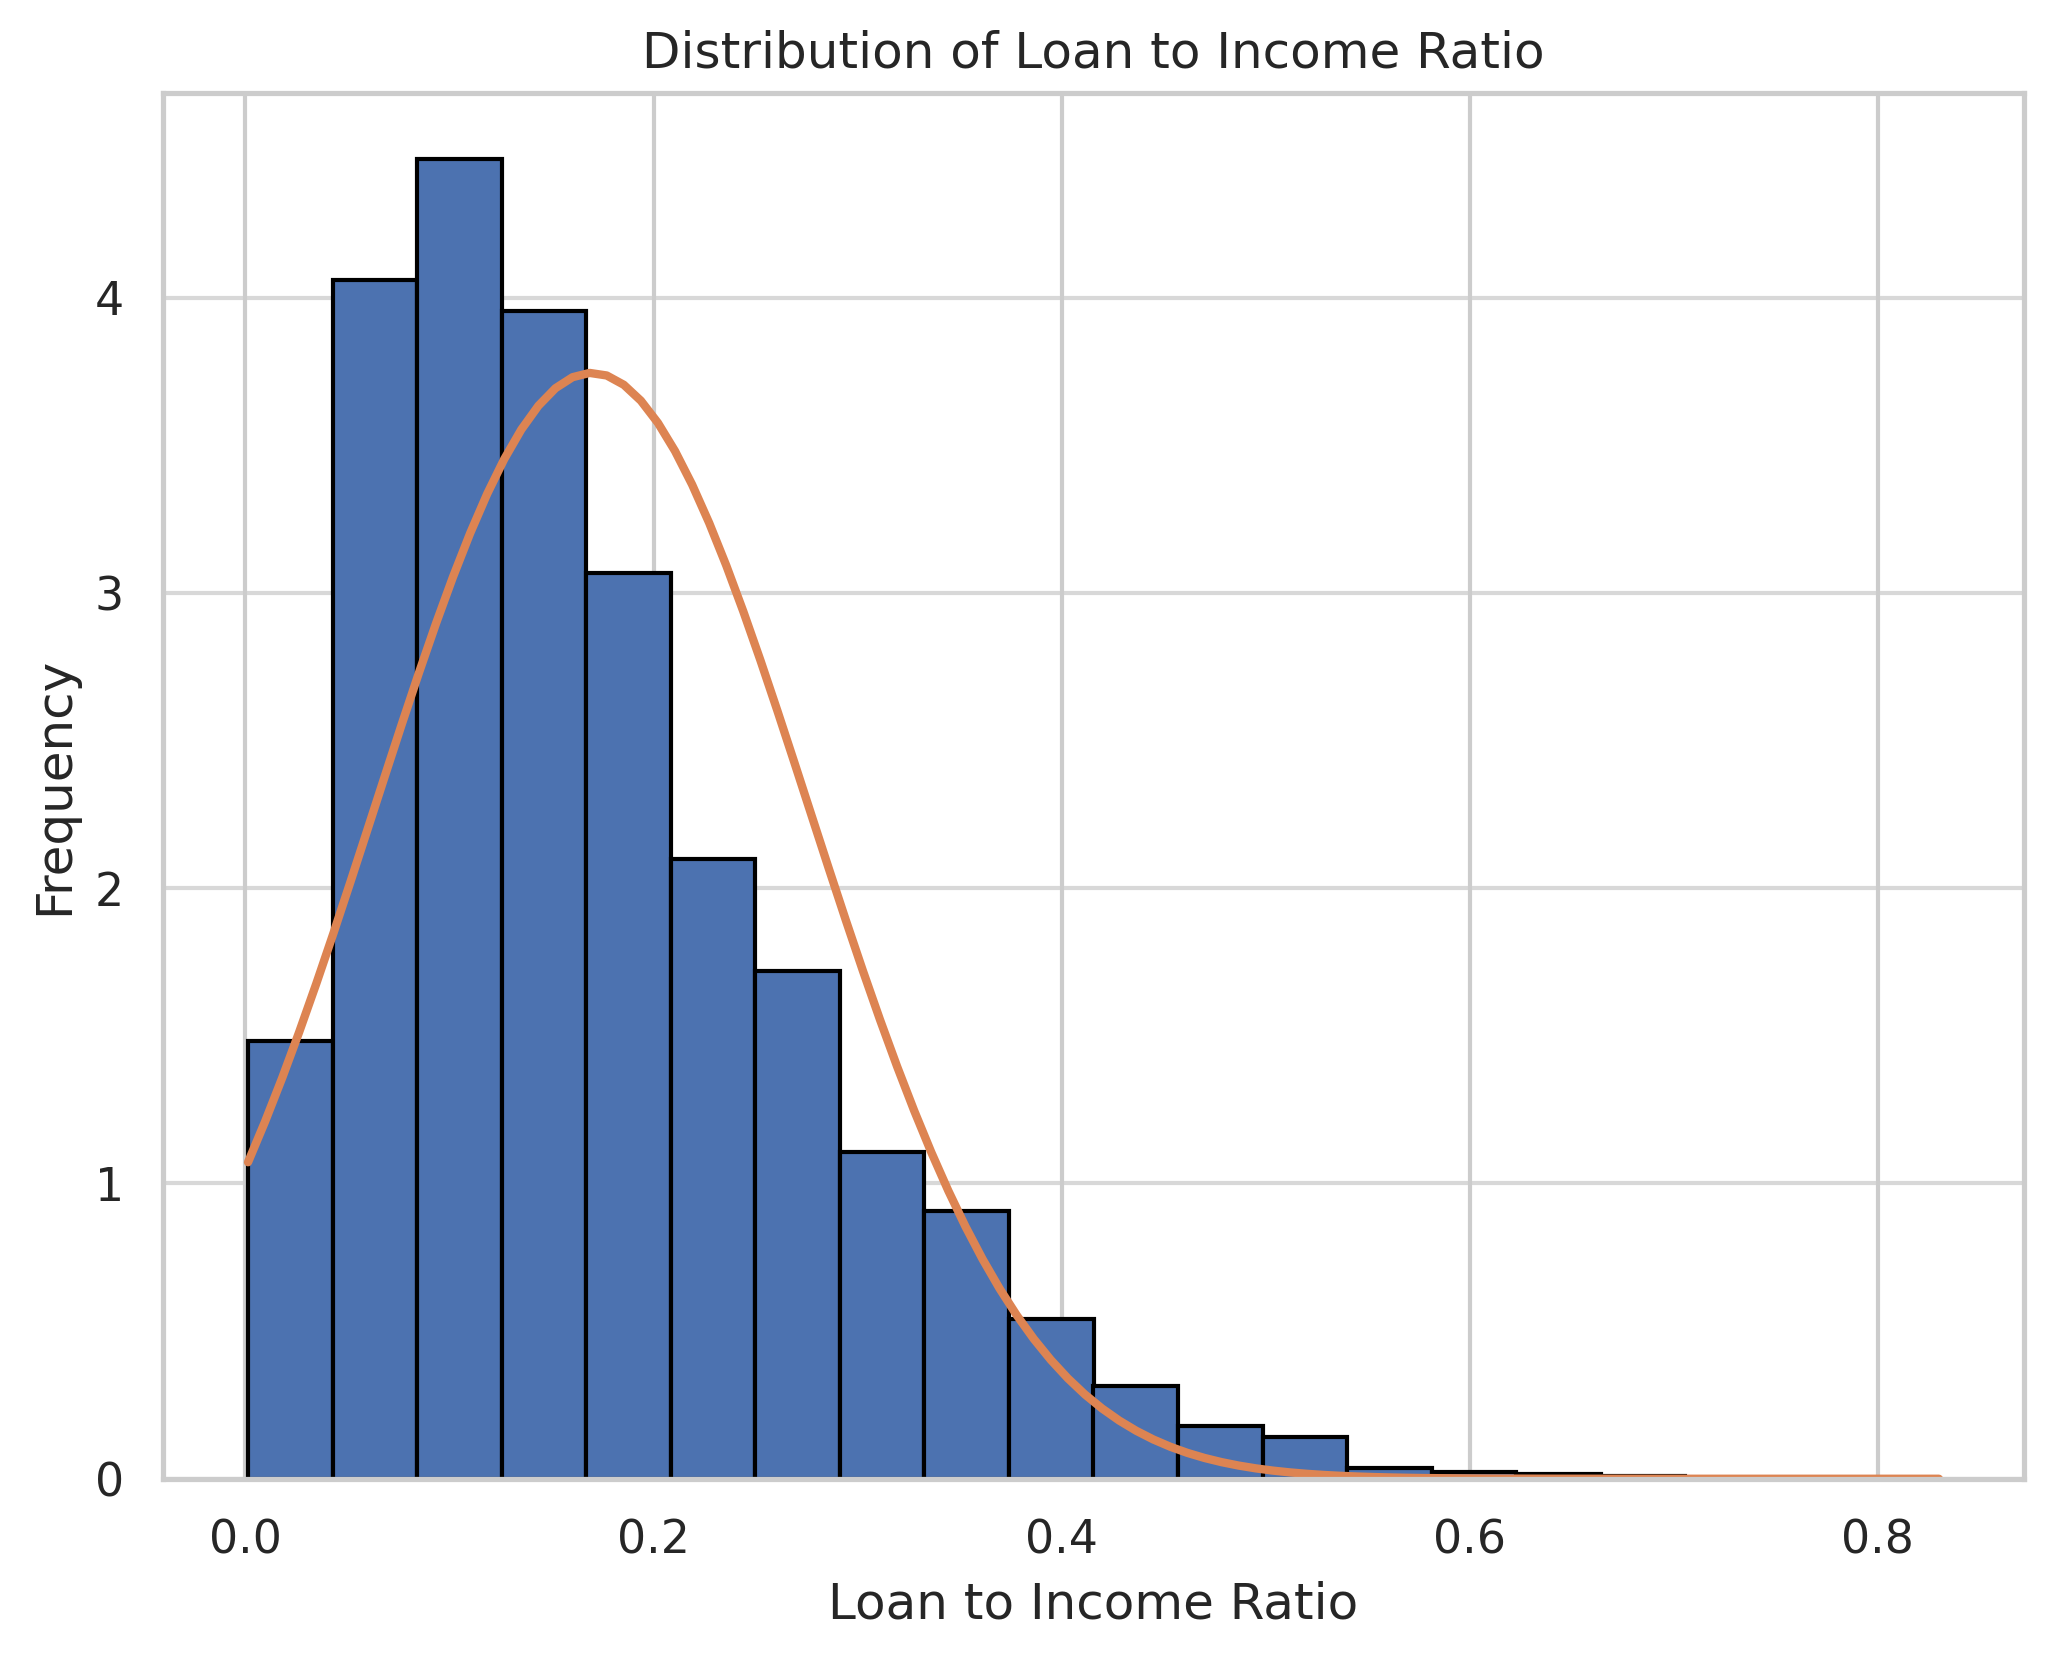

In [ ]:
# Histogram for Loan_to_income_Ratio
mean = df_clean['Loan_to_income_Ratio'].mean()
std = df_clean['Loan_to_income_Ratio'].std()

xmin, xmax = df_clean['Loan_to_income_Ratio'].min(), df_clean['Loan_to_income_Ratio'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['Loan_to_income_Ratio'], bins=20, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Loan to Income Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Loan to Income Ratio")
plt.grid(axis='y', alpha=0.75)
plt.show()

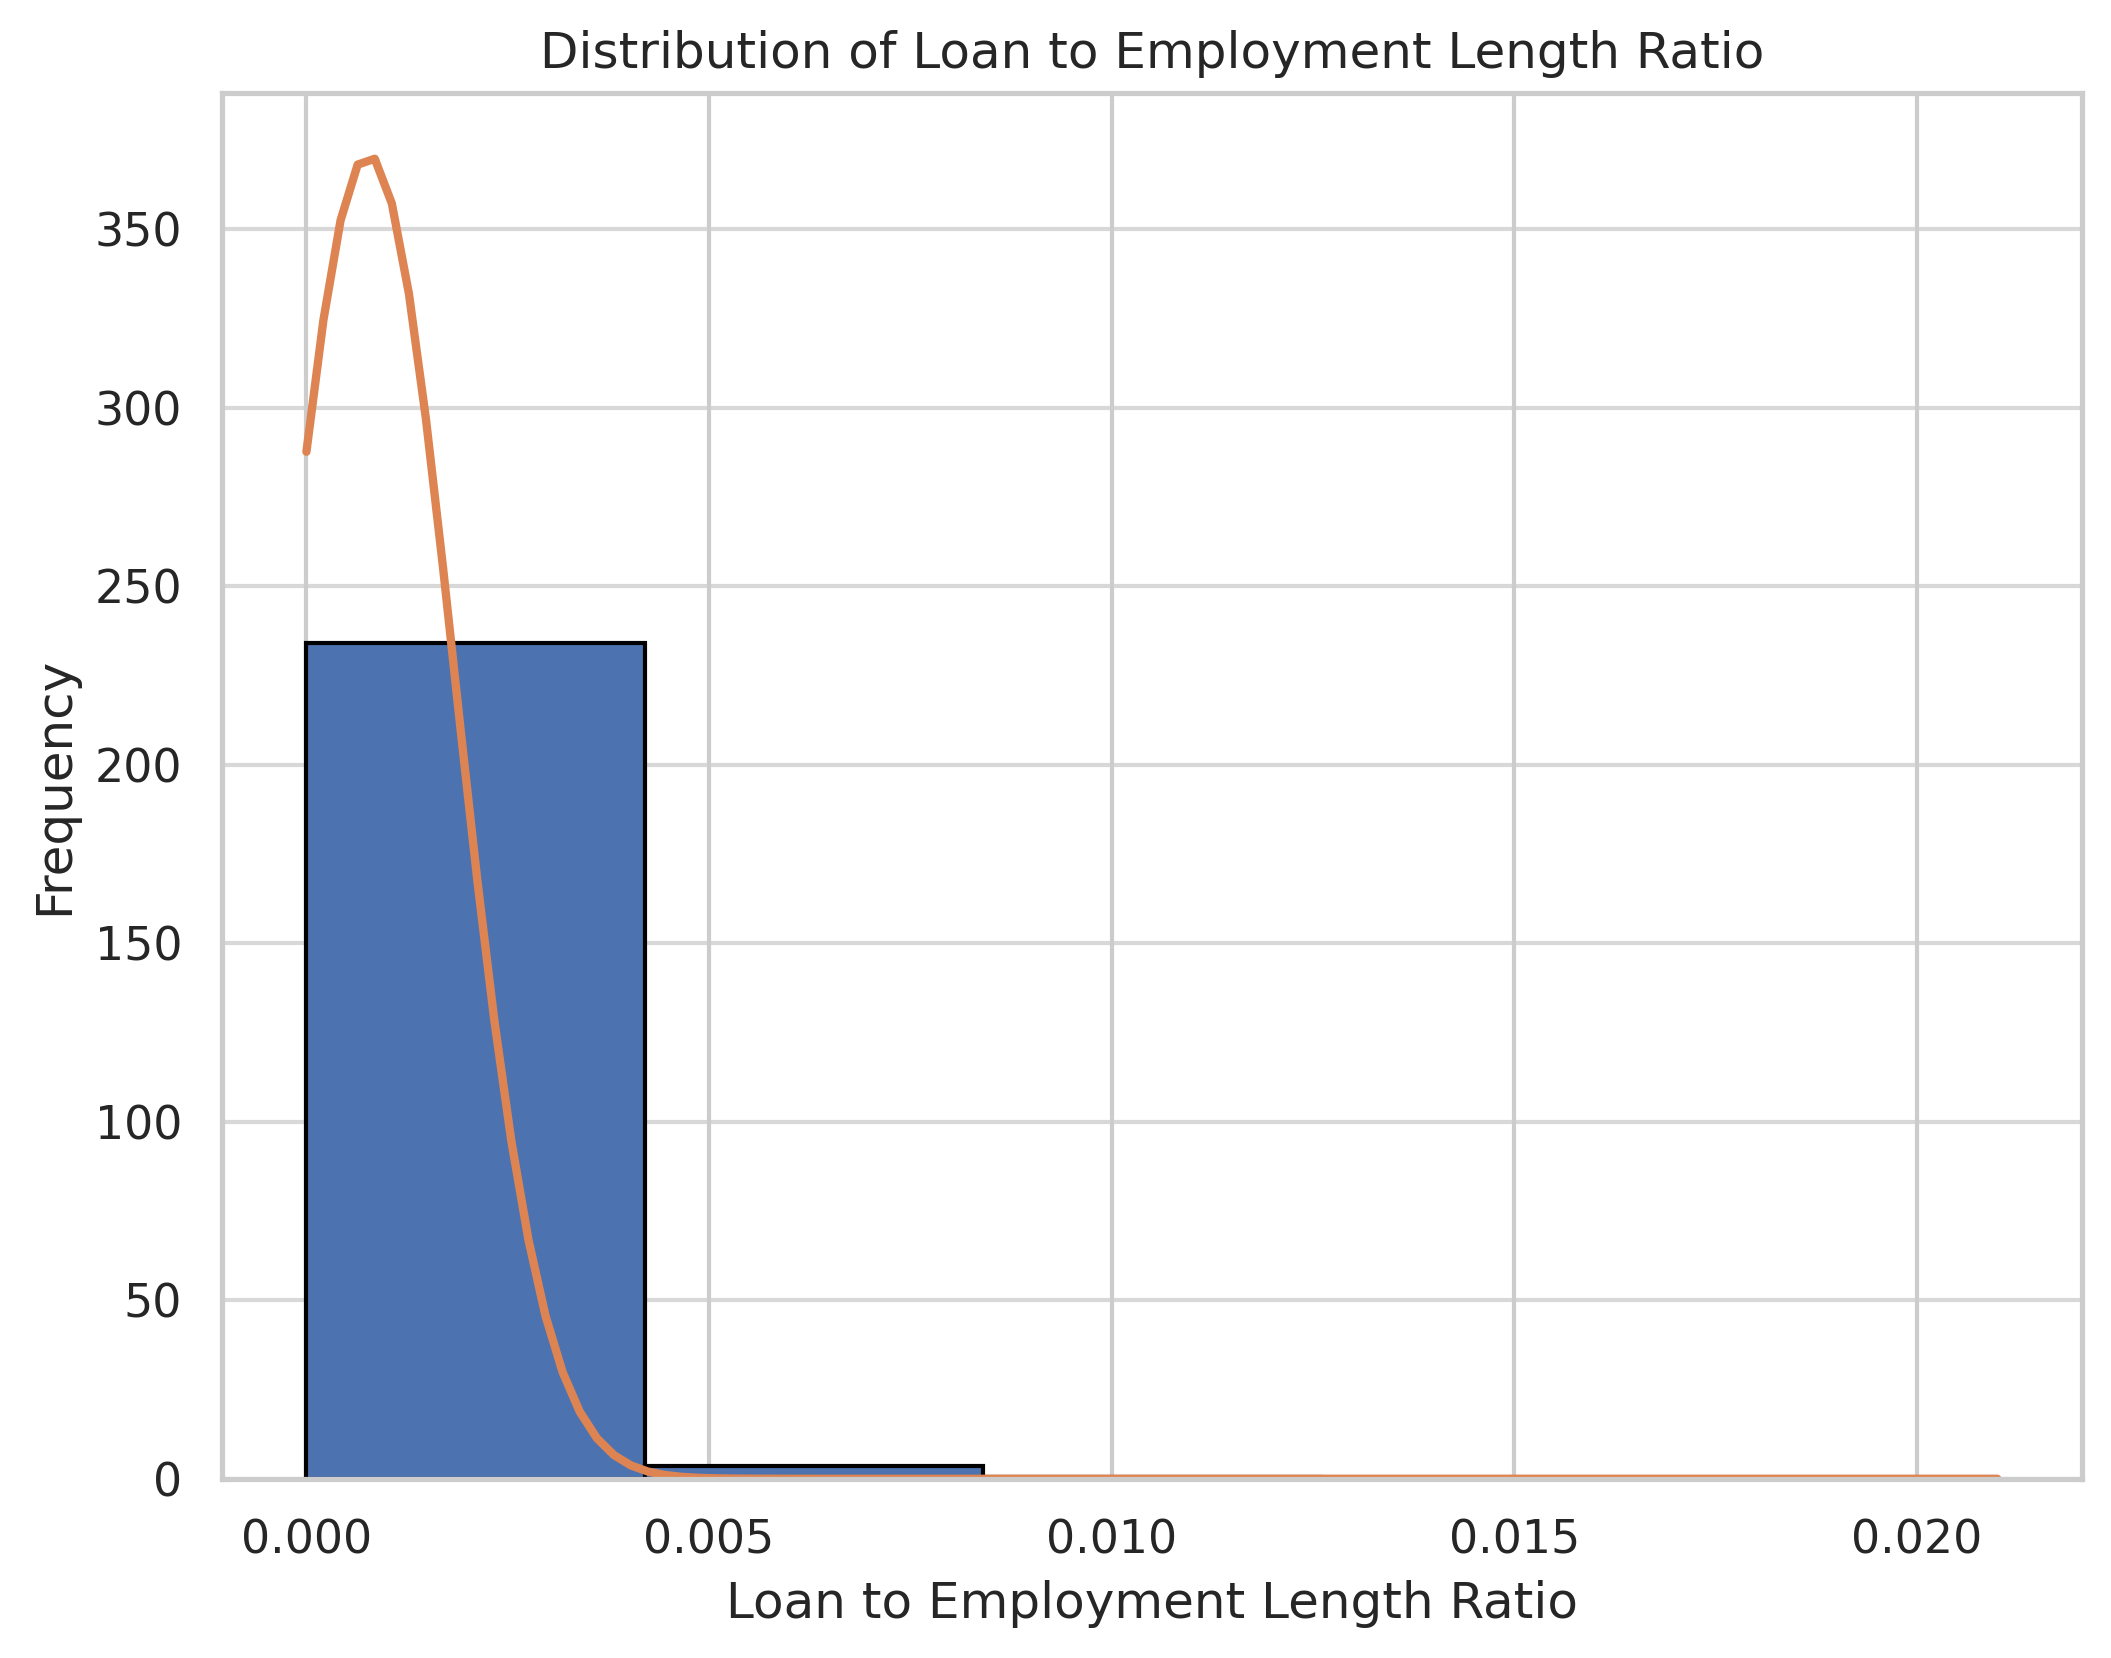

In [ ]:
# Histogram for Loan_to_emp_length_ratio
mean = df_clean['Loan_to_emp_length_ratio'].mean()
std = df_clean['Loan_to_emp_length_ratio'].std()

xmin, xmax = df_clean['Loan_to_emp_length_ratio'].min(), df_clean['Loan_to_emp_length_ratio'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['Loan_to_emp_length_ratio'], bins=5, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Loan to Employment Length Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Loan to Employment Length Ratio")
plt.grid(axis='y', alpha=0.75)
plt.show()

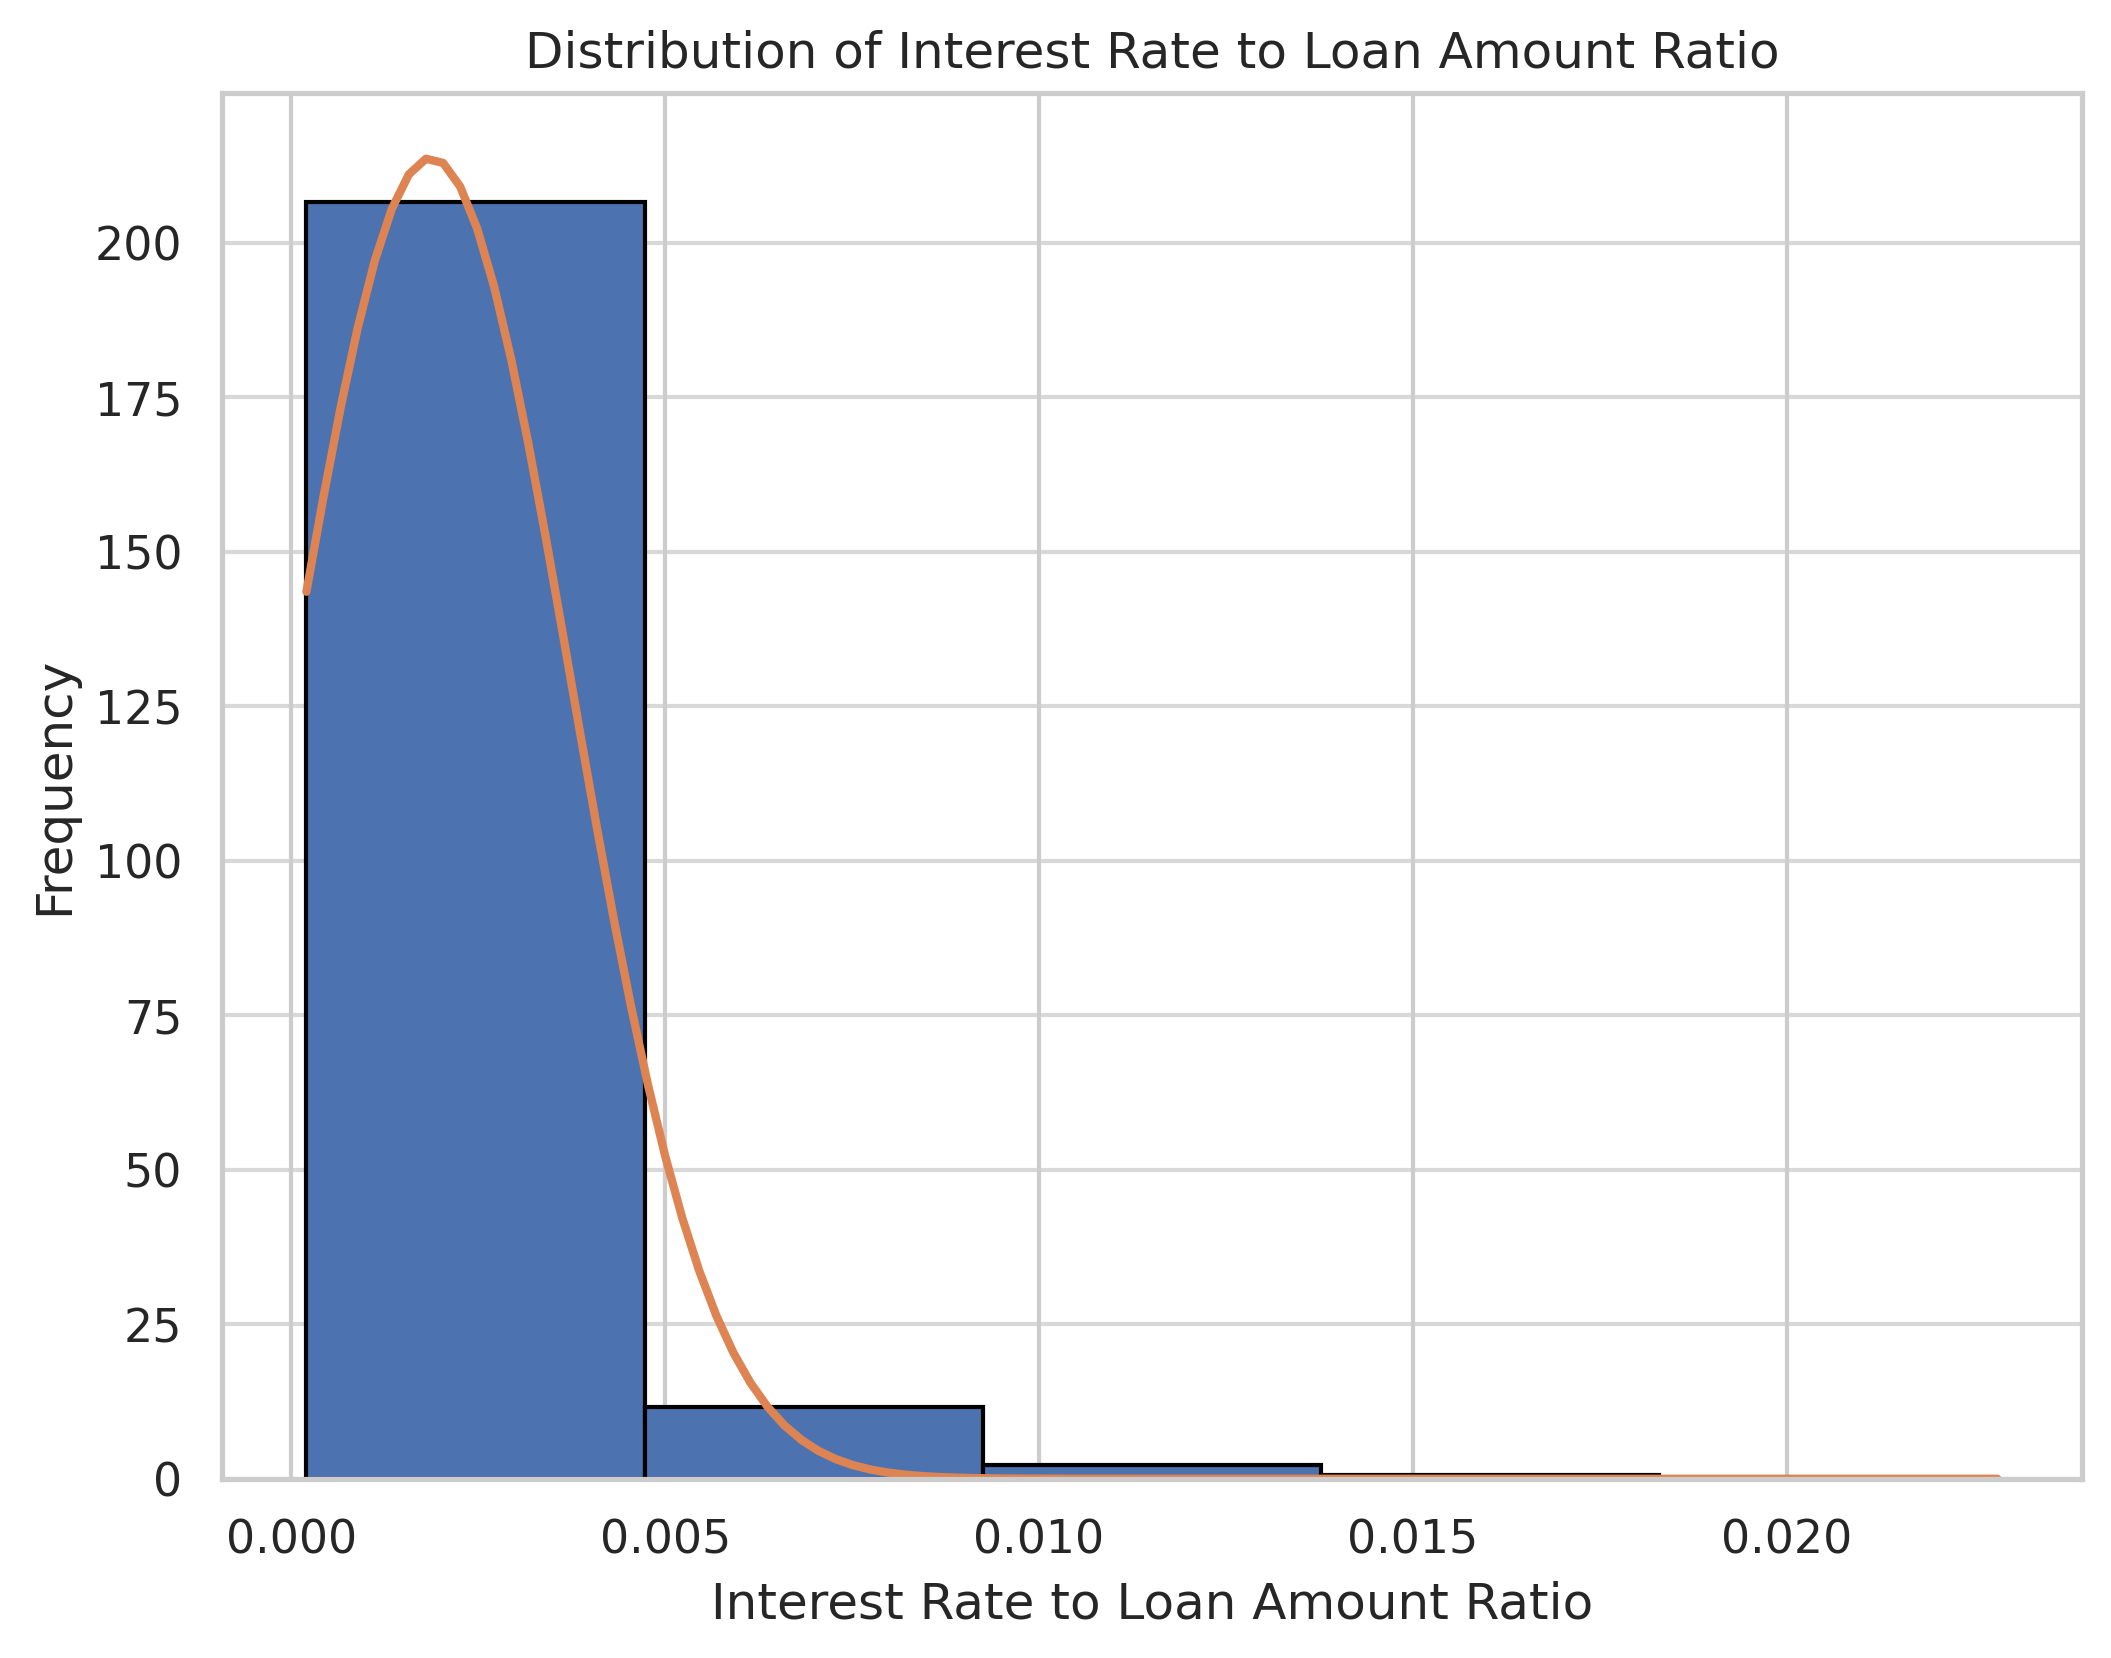

In [ ]:
# Histogram for int_rate_to_loan_amnt_ratio
mean = df_clean['int_rate_to_loan_amnt_ratio'].mean()
std = df_clean['int_rate_to_loan_amnt_ratio'].std()

xmin, xmax = df_clean['int_rate_to_loan_amnt_ratio'].min(), df_clean['int_rate_to_loan_amnt_ratio'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.figure(figsize=(8, 6), dpi=300)
plt.hist(df_clean['int_rate_to_loan_amnt_ratio'], bins=5, edgecolor='black', density=True)
plt.plot(x, p, linewidth=2)
plt.xlabel("Interest Rate to Loan Amount Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rate to Loan Amount Ratio")
plt.grid(axis='y', alpha=0.75)
plt.show()

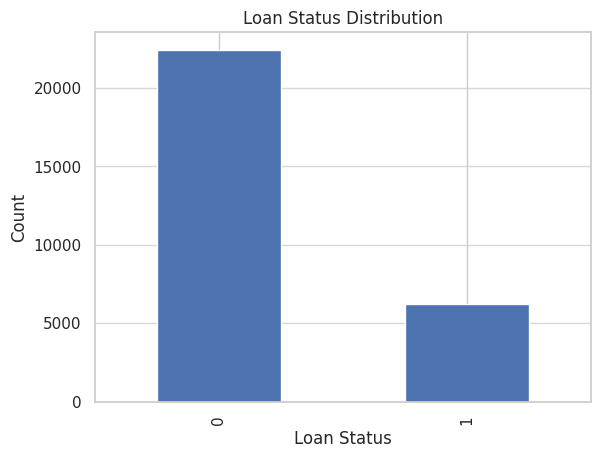

In [ ]:
#Barchart for loan status
df_clean['loan_status'].value_counts().plot(kind='bar')

plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Loan Status Distribution")
plt.grid(axis='y', alpha=0.75)
plt.show()


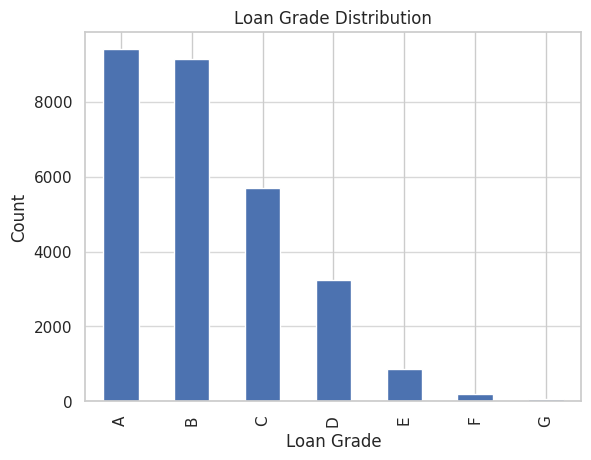

In [ ]:
#Barchart for loan grade
df_clean['loan_grade'].value_counts().plot(kind='bar')

plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.title("Loan Grade Distribution")
plt.grid(axis='y', alpha=0.75)
plt.show()

<Figure size 2400x1800 with 0 Axes>

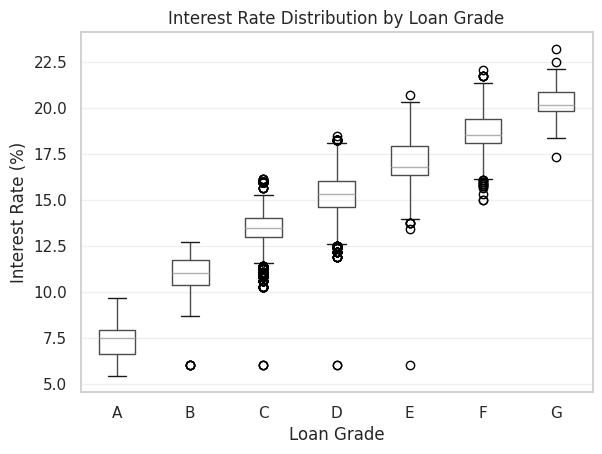

In [ ]:
# boxplot for loan grade and interest rate
df_clean['loan_grade'] = pd.Categorical(
    df_clean['loan_grade'],
    categories=["A","B","C","D","E","F","G"],
    ordered=True
)

plt.figure(figsize=(8, 6), dpi=300)

df_clean.boxplot(column='loan_int_rate', by='loan_grade', grid=False)

plt.title("Interest Rate Distribution by Loan Grade")
plt.suptitle("")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
df2 = df_clean.copy()

In [ ]:
df2_grade_e = df2[df2['loan_grade'] == 'E'].sort_values(by='loan_int_rate')
display(df2_grade_e)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
20690,35,34868,RENT,14,MEDICAL,E,5000,6.00,1,0.14,N,6,0.143398,0.0028,0.001200
15710,24,36000,RENT,8,VENTURE,E,15450,13.43,1,0.43,N,2,0.429167,0.000518,0.000869
24015,31,29000,RENT,0,DEBTCONSOLIDATION,E,10000,13.75,1,0.34,N,8,0.344828,0.0,0.001375
22789,29,56200,RENT,0,EDUCATION,E,7725,13.75,1,0.14,N,6,0.137456,0.0,0.001780
2128,23,47000,RENT,7,PERSONAL,E,2400,13.75,0,0.05,Y,4,0.051064,0.002917,0.005729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27779,32,220000,MORTGAGE,13,HOMEIMPROVEMENT,E,33000,20.30,0,0.15,N,9,0.150000,0.000394,0.000615
19234,31,36000,RENT,5,HOMEIMPROVEMENT,E,13000,20.30,1,0.36,Y,5,0.361111,0.000385,0.001562
7625,24,74000,RENT,7,DEBTCONSOLIDATION,E,6800,20.30,1,0.09,Y,2,0.091892,0.001029,0.002985
2608,22,37000,RENT,2,DEBTCONSOLIDATION,E,3000,20.30,1,0.08,N,2,0.081081,0.000667,0.006767


In [ ]:
df2_grade_d = df2[df2['loan_grade'] == 'D'].sort_values(by='loan_int_rate')
display(df2_grade_d)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
13530,24,73000,RENT,6,DEBTCONSOLIDATION,D,12500,6.00,1,0.17,N,2,0.171233,0.00048,0.000480
24426,28,72000,MORTGAGE,8,PERSONAL,D,7500,6.00,0,0.10,N,10,0.104167,0.001067,0.000800
8976,23,46000,RENT,2,EDUCATION,D,8000,11.86,1,0.17,N,3,0.173913,0.00025,0.001482
12983,23,86400,OWN,0,EDUCATION,D,16000,11.86,0,0.19,N,3,0.185185,0.0,0.000741
4397,24,40000,OWN,6,MEDICAL,D,5000,11.86,0,0.13,N,4,0.125000,0.0012,0.002372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22919,32,29000,RENT,0,EDUCATION,D,8000,18.25,1,0.28,N,6,0.275862,0.0,0.002281
30556,36,59800,MORTGAGE,20,VENTURE,D,18200,18.25,0,0.30,Y,15,0.304348,0.001099,0.001003
6,23,113000,RENT,8,DEBTCONSOLIDATION,D,35000,18.25,1,0.31,N,4,0.309735,0.000229,0.000521
2637,22,33600,OWN,1,MEDICAL,D,5000,18.25,0,0.15,N,2,0.148810,0.0002,0.003650


In [ ]:
df2_grade_c = df2[df2['loan_grade'] == 'C'].sort_values(by='loan_int_rate')
display(df2_grade_c)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
32412,53,28000,RENT,2,DEBTCONSOLIDATION,C,7000,6.00,0,0.25,N,26,0.250000,0.000286,0.000857
6182,26,26400,RENT,6,MEDICAL,C,6000,6.00,0,0.23,N,4,0.227273,0.001,0.001000
9569,25,62500,MORTGAGE,5,DEBTCONSOLIDATION,C,15000,6.00,0,0.24,N,3,0.240000,0.000333,0.000400
4406,25,35000,RENT,1,MEDICAL,C,4800,10.28,0,0.14,N,2,0.137143,0.000208,0.002142
19806,30,30000,RENT,1,VENTURE,C,3600,10.28,0,0.12,Y,10,0.120000,0.000278,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21395,34,48000,MORTGAGE,9,VENTURE,C,5600,15.96,0,0.12,Y,7,0.116667,0.001607,0.002850
17832,27,100000,RENT,1,DEBTCONSOLIDATION,C,35000,16.11,1,0.35,N,9,0.350000,0.000029,0.000460
24134,30,42000,RENT,4,MEDICAL,C,10000,16.11,0,0.24,N,9,0.238095,0.0004,0.001611
5621,23,45600,MORTGAGE,7,VENTURE,C,10000,16.11,0,0.22,Y,4,0.219298,0.0007,0.001611


In [ ]:
grades_to_remove = ['B', 'C', 'D', 'E']
df2_filtered = df2[~((df2['loan_int_rate'] == 6) & (df2['loan_grade'].isin(grades_to_remove)))].copy()
display(df2_filtered.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
0,23,95000,RENT,2,VENTURE,A,35000,7.90,1,0.37,N,2,0.368421,0.000057,0.000226
1,26,108160,RENT,4,EDUCATION,E,35000,18.39,1,0.32,N,4,0.323595,0.000114,0.000525
2,23,115000,RENT,2,EDUCATION,A,35000,7.90,0,0.30,N,4,0.304348,0.000057,0.000226
3,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,0.060000,0.000233,0.000355
4,23,120000,RENT,0,EDUCATION,A,35000,7.90,0,0.29,N,4,0.291667,0.0,0.000226


<Figure size 2400x1800 with 0 Axes>

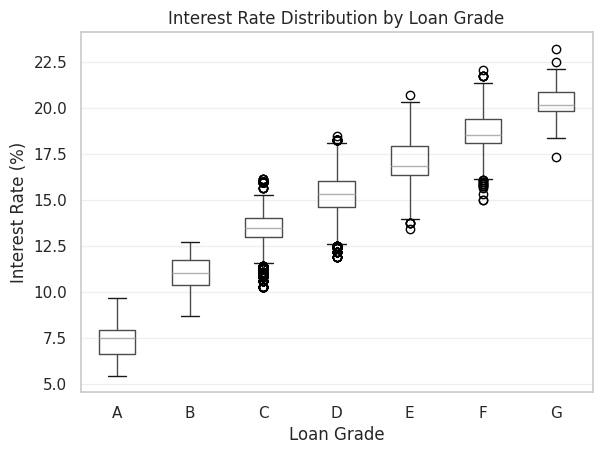

In [ ]:
# boxplot for loan grade and interest rate
df2_filtered['loan_grade'] = pd.Categorical(
    df2_filtered['loan_grade'],
    categories=["A","B","C","D","E","F","G"],
    ordered=True
)

plt.figure(figsize=(8, 6), dpi=300)

df2_filtered.boxplot(column='loan_int_rate', by='loan_grade', grid=False)

plt.title("Interest Rate Distribution by Loan Grade")
plt.suptitle("")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.grid(axis='y', alpha=0.3)
plt.show()

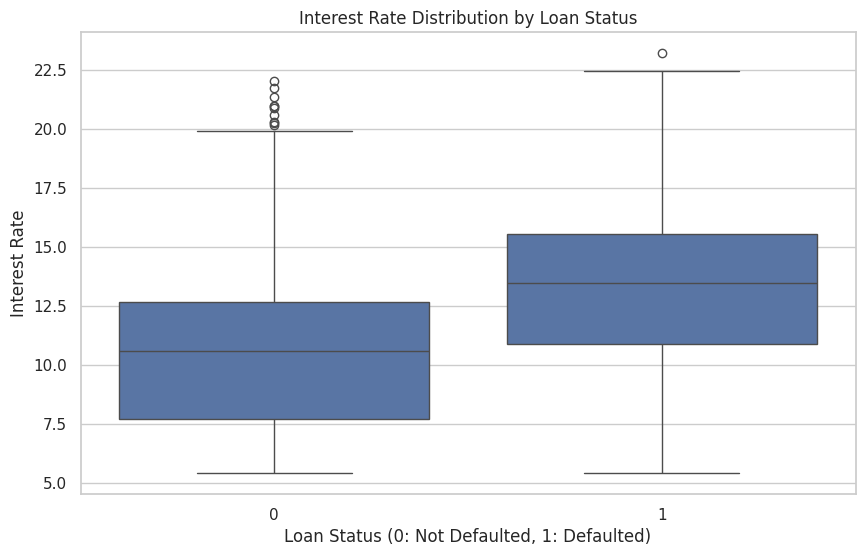

In [ ]:
# Boxplot for loan status and interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df_clean)
plt.title("Interest Rate Distribution by Loan Status")
plt.xlabel("Loan Status (0: Not Defaulted, 1: Defaulted)")
plt.ylabel("Interest Rate")
plt.show()


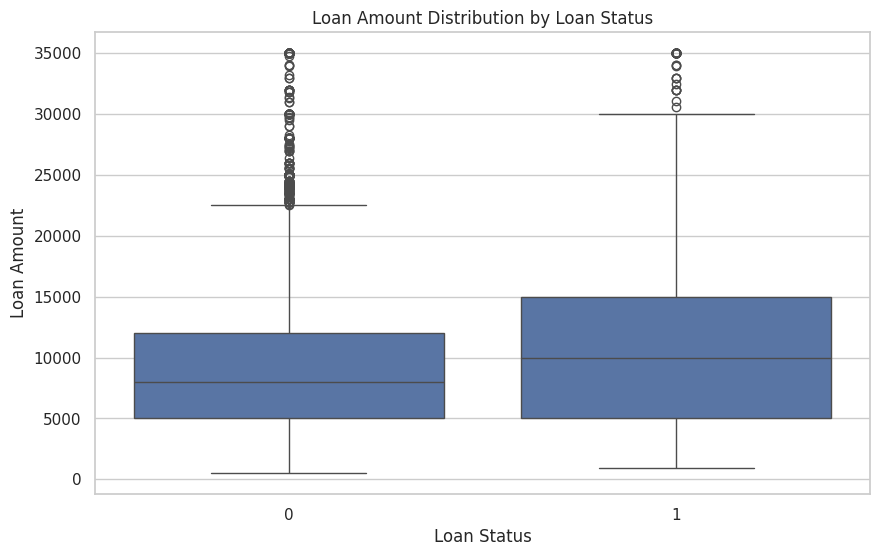

In [ ]:
# Boxplot for loan status and loan amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_clean)
plt.title("Loan Amount Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


In [ ]:
# Descriptive statistics for numeric variables
display(df_clean.describe().style.format('{:.3f}'))

# Frequencies for categorical variables
categorical_cols = df_clean.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nFrequency distribution for {col}:\n")
    display(df_clean[col].value_counts())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
count,28621.000,28621.000,28621.000,28621.000,28621.000,28621.000,28621.000,28621.000,28621.000,28621.000,28621.000
mean,27.714,66434.808,4.780,9651.177,11.040,0.216,0.169,5.795,0.170,0.001,0.002
std,6.172,51551.581,4.036,6317.716,3.230,0.412,0.106,4.037,0.107,0.001,0.002
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000,0.001,0.000,0.000
25%,23.000,39480.000,2.000,5000.000,7.900,0.000,0.090,3.000,0.089,0.000,0.001
50%,26.000,55900.000,4.000,8000.000,10.990,0.000,0.150,4.000,0.147,0.000,0.001
75%,30.000,80000.000,7.000,12500.000,13.480,0.000,0.230,8.000,0.227,0.001,0.002
max,84.000,2039784.000,41.000,35000.000,23.220,1.000,0.830,30.000,0.830,0.021,0.023


In [ ]:
print("Frequency distribution for loan_grade:\n")
display(df_clean['loan_grade'].value_counts())

print("\nFrequency distribution for loan_status:\n")
display(df_clean['loan_status'].value_counts())

print("\nFrequency distribution for loan_intent:\n")
display(df_clean['loan_intent'].value_counts())

Frequency distribution for loan_grade:



,count
loan_grade,
A,9398
B,9145
C,5694
D,3246
E,870
F,209
G,59



Frequency distribution for loan_status:



,count
loan_status,
0,22429
1,6192



Frequency distribution for loan_intent:



,count
loan_intent,
EDUCATION,5700
MEDICAL,5289
VENTURE,4996
PERSONAL,4874
DEBTCONSOLIDATION,4565
HOMEIMPROVEMENT,3197


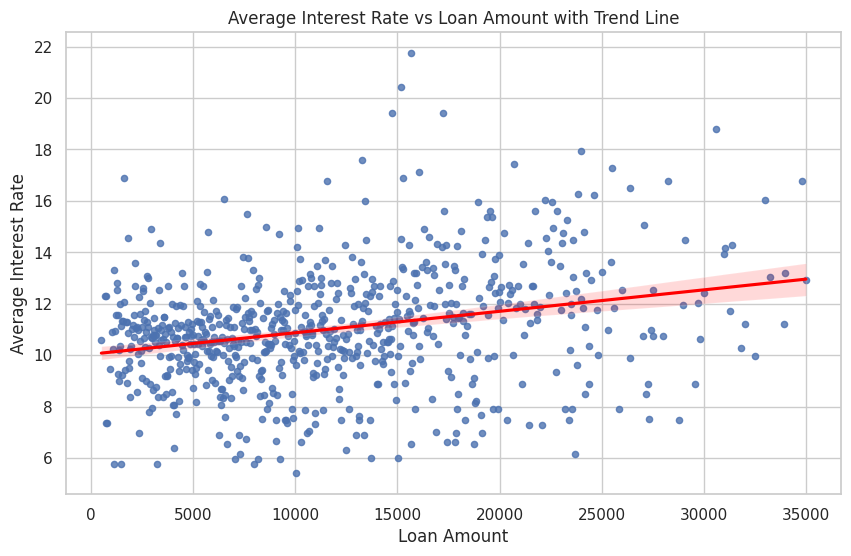

In [ ]:
# The average interest rate for each loan amount
avg_int_rate_by_loan_amount = df_clean.groupby('loan_amnt')['loan_int_rate'].mean().reset_index()

# scatterplot of average interest rate vs loan amount with a smooth trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='loan_amnt', y='loan_int_rate', data=avg_int_rate_by_loan_amount, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.xlabel("Loan Amount")
plt.ylabel("Average Interest Rate")
plt.title("Average Interest Rate vs Loan Amount with Trend Line")
plt.grid(True)
plt.show()

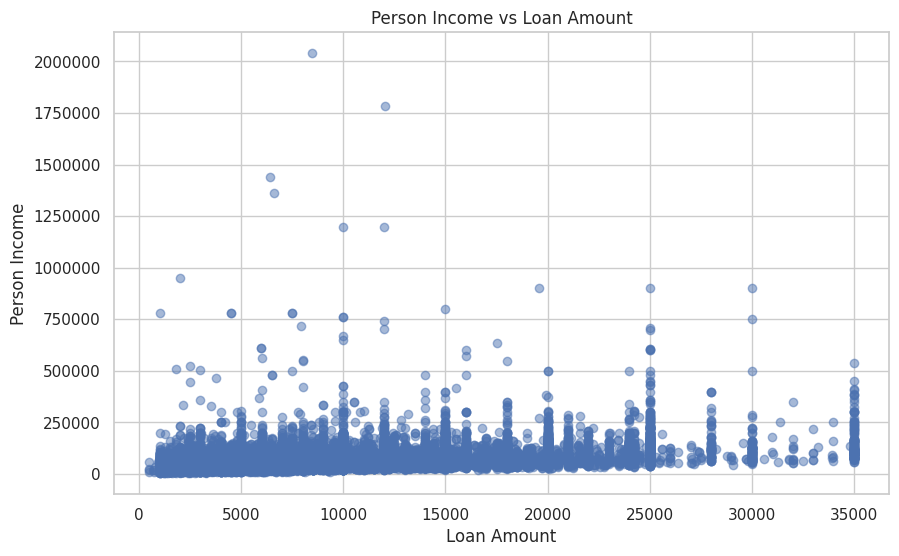

In [ ]:
# Scatterplot of person income vs loan amount
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['loan_amnt'], df_clean['person_income'], alpha=0.5)
plt.xlabel("Loan Amount")
plt.ylabel("Person Income")
plt.title("Person Income vs Loan Amount")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
df2_filtered

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
0,23,95000,RENT,2,VENTURE,A,35000,7.90,1,0.37,N,2,0.368421,0.000057,0.000226
1,26,108160,RENT,4,EDUCATION,E,35000,18.39,1,0.32,N,4,0.323595,0.000114,0.000525
2,23,115000,RENT,2,EDUCATION,A,35000,7.90,0,0.30,N,4,0.304348,0.000057,0.000226
3,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,0.060000,0.000233,0.000355
4,23,120000,RENT,0,EDUCATION,A,35000,7.90,0,0.29,N,4,0.291667,0.0,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30,0.109434,0.000172,0.002269
32565,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19,0.146875,0.000227,0.000425
32566,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0.460526,0.000086,0.000314
32567,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26,0.100000,0.000333,0.000765


In [ ]:
categorical_cols = df2_filtered.select_dtypes(exclude=['number']).columns
print(categorical_cols)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [ ]:
df2_filtered=df2_filtered.replace({'cb_person_default_on_file': {'N': int(0), 'Y': int(1)}})
df2_filtered=df2_filtered.replace({'loan_grade': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}})

/tmp/ipython-input-188036556.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_filtered=df2_filtered.replace({'cb_person_default_on_file': {'N': int(0), 'Y': int(1)}})
/tmp/ipython-input-188036556.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2_filtered=df2_filtered.replace({'cb_person_default_on_file': {'N': int(0), 'Y': int(1)}})
/tmp/ipython-input-188036556.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [ ]:
df2_filtered

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
0,23,95000,RENT,2,VENTURE,1,35000,7.90,1,0.37,0,2,0.368421,0.000057,0.000226
1,26,108160,RENT,4,EDUCATION,5,35000,18.39,1,0.32,0,4,0.323595,0.000114,0.000525
2,23,115000,RENT,2,EDUCATION,1,35000,7.90,0,0.30,0,4,0.304348,0.000057,0.000226
3,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,2,30000,10.65,0,0.06,0,3,0.060000,0.000233,0.000355
4,23,120000,RENT,0,EDUCATION,1,35000,7.90,0,0.29,0,4,0.291667,0.0,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,MORTGAGE,1,PERSONAL,3,5800,13.16,0,0.11,0,30,0.109434,0.000172,0.002269
32565,54,120000,MORTGAGE,4,PERSONAL,1,17625,7.49,0,0.15,0,19,0.146875,0.000227,0.000425
32566,65,76000,RENT,3,HOMEIMPROVEMENT,2,35000,10.99,1,0.46,0,28,0.460526,0.000086,0.000314
32567,56,150000,MORTGAGE,5,PERSONAL,2,15000,11.48,0,0.10,0,26,0.100000,0.000333,0.000765


In [ ]:
categorical_cols = df2_filtered.select_dtypes(include=['category', 'object']).columns
print(categorical_cols)


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [ ]:
df3 = df2_filtered.copy()

In [ ]:
df2_filtered=pd.get_dummies(df2_filtered, columns=['loan_intent','person_home_ownership'], drop_first=True)

model selection &trainig, model evaluation,Feature importance and predection
1-model selection
2-training
3-model evaluation
4-feature importamnce
5-predection


In [ ]:
df2_filtered

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,23,95000,2,1,35000,7.90,1,0.37,0,2,0.368421,0.000057,0.000226,False,False,False,False,True,False,False,True
1,26,108160,4,5,35000,18.39,1,0.32,0,4,0.323595,0.000114,0.000525,True,False,False,False,False,False,False,True
2,23,115000,2,1,35000,7.90,0,0.30,0,4,0.304348,0.000057,0.000226,True,False,False,False,False,False,False,True
3,23,500000,7,2,30000,10.65,0,0.06,0,3,0.060000,0.000233,0.000355,False,False,False,False,False,False,False,False
4,23,120000,0,1,35000,7.90,0,0.29,0,4,0.291667,0.0,0.000226,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,1,3,5800,13.16,0,0.11,0,30,0.109434,0.000172,0.002269,False,False,False,True,False,False,False,False
32565,54,120000,4,1,17625,7.49,0,0.15,0,19,0.146875,0.000227,0.000425,False,False,False,True,False,False,False,False
32566,65,76000,3,2,35000,10.99,1,0.46,0,28,0.460526,0.000086,0.000314,False,True,False,False,False,False,False,True
32567,56,150000,5,2,15000,11.48,0,0.10,0,26,0.100000,0.000333,0.000765,False,False,False,True,False,False,False,False


In [ ]:
for col in categorical_cols:
    if col in df2_filtered.columns:
        df2_filtered[col] = df2_filtered[col].astype(float)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
df2_filtered.isnull().sum()

,0
person_age,0
person_income,0
person_emp_length,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [ ]:
print(df2_filtered.dtypes)


person_age                       int64
person_income                    int64
person_emp_length                Int64
loan_grade                     float64
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_default_on_file      float64
cb_person_cred_hist_length       int64
Loan_to_income_Ratio           float64
Loan_to_emp_length_ratio       Float64
int_rate_to_loan_amnt_ratio    float64
loan_intent_EDUCATION             bool
loan_intent_HOMEIMPROVEMENT       bool
loan_intent_MEDICAL               bool
loan_intent_PERSONAL              bool
loan_intent_VENTURE               bool
person_home_ownership_OTHER       bool
person_home_ownership_OWN         bool
person_home_ownership_RENT        bool
dtype: object


In [ ]:
x=df2_filtered.drop('loan_status',axis=1)
y=df2_filtered['loan_status']

# Convert 'person_emp_length' to float before applying SMOTE
x['person_emp_length'] = x['person_emp_length'].astype(float)

smote=SMOTE(sampling_strategy='minority',random_state =42)
X,Y=smote.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report
import xgboost as xgb

In [ ]:
LR=LogisticRegression()
# DT=DecisionTreeClassifier()
# RF=RandomForestClassifier()
# SVM=SVC()
# KNN=KNeighborsClassifier()

In [ ]:
LR.fit(x_train,y_train)

LR_pred=LR.predict(x_test)
LR_train_acc=LR.score(x_train,y_train)
LR_test_acc=LR.score(x_test,y_test)
LR_f1_score=f1_score(y_test,LR_pred,average='weighted')
# LR_confusion_matrix=confusion_matrix(y_test,LR_pred)
LR_classification_report=classification_report(y_test,LR_pred)

print(f'LR_train_acc:{LR_train_acc}')
print(f'LR_test_acc:{LR_test_acc}')
print(f'LR_f1_score:{LR_f1_score}')
print(f'LR_classification_report:\n{LR_classification_report}')

LR_train_acc:0.7417763157894737
LR_test_acc:0.7358385370205174
LR_f1_score:0.7355647275100643
LR_classification_report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      4554
           1       0.71      0.77      0.74      4414

    accuracy                           0.74      8968
   macro avg       0.74      0.74      0.74      8968
weighted avg       0.74      0.74      0.74      8968



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


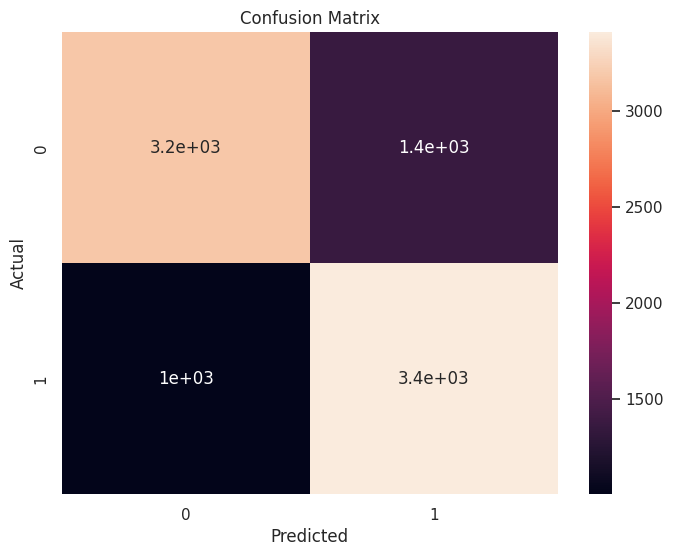

In [ ]:
LR_cm = confusion_matrix(y_test, LR_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(LR_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
DT=DecisionTreeClassifier(criterion='gini')
DT.fit(x_train,y_train)

DT_pred=DT.predict(x_test)
DT_train_acc=DT.score(x_train,y_train)
DT_test_acc=DT.score(x_test,y_test)
DT_f1_score=f1_score(y_test,DT_pred,average='weighted')
# DT_confusion_matrix=confusion_matrix(y_test,DT_pred)
DT_classification_report=classification_report(y_test,DT_pred)

print(f'DT_train_acc:{DT_train_acc}')
print(f'DT_test_acc:{DT_test_acc}')
print(f'DT_f1_score:{DT_f1_score}')
print(f'DT_classification_report:\n{DT_classification_report}')



DT_train_acc:1.0
DT_test_acc:0.9214986619090099
DT_f1_score:0.92149893130738
DT_classification_report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4554
           1       0.91      0.94      0.92      4414

    accuracy                           0.92      8968
   macro avg       0.92      0.92      0.92      8968
weighted avg       0.92      0.92      0.92      8968



<function matplotlib.pyplot.show(close=None, block=None)>

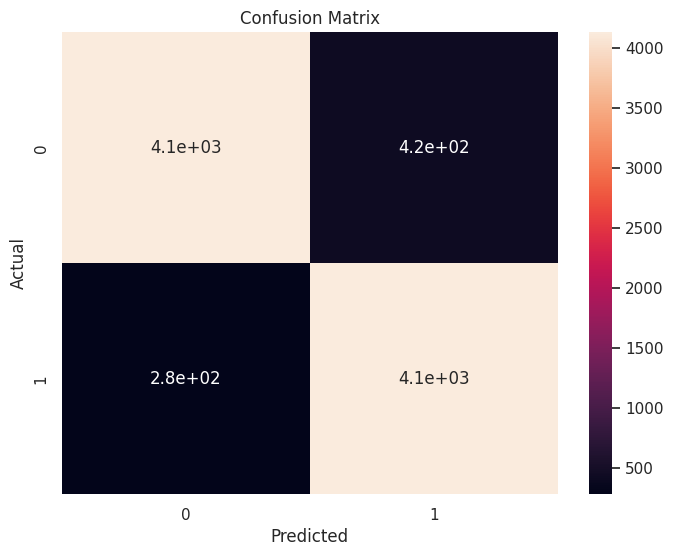

In [ ]:
DT_cm=confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(DT_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [ ]:
RM=RandomForestClassifier(n_estimators=100)
RM.fit(x_train,y_train)
RM_pred=RM.predict(x_test)
RM_train_acc=RM.score(x_train,y_train)
RM_test_acc=RM.score(x_test,y_test)
RM_f1_score=f1_score(y_test,RM_pred)
RM_classification_report=classification_report(y_test,RM_pred)

print(f'RM_train_acc:{RM_train_acc}')
print(f'RM_test_acc:{RM_test_acc}')
print(f'RM_f1_score:{RM_f1_score}')
print(f'RM_classification_report:\n{RM_classification_report}')

RM_train_acc:1.0
RM_test_acc:0.9487065120428189
RM_f1_score:0.9465985604829348
RM_classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4554
           1       0.97      0.92      0.95      4414

    accuracy                           0.95      8968
   macro avg       0.95      0.95      0.95      8968
weighted avg       0.95      0.95      0.95      8968



Text(66.25, 0.5, 'Actual')

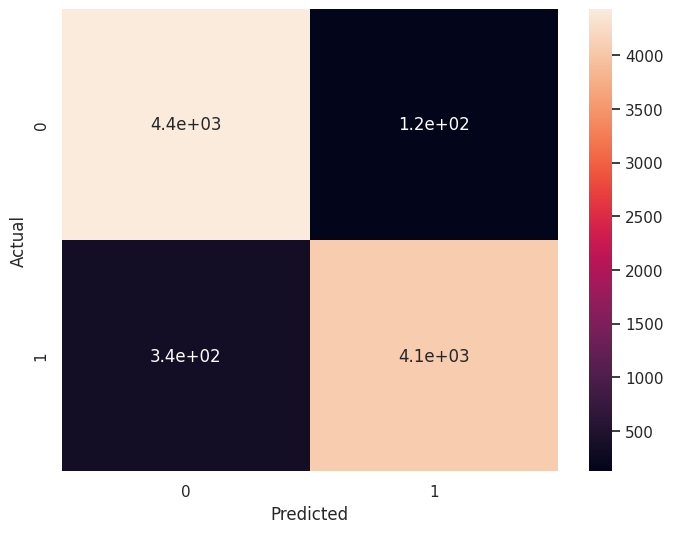

In [ ]:
RM_cm=confusion_matrix(y_test,RM_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(RM_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
SVM=SVC()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_train_acc=SVM.score(x_train,y_train)
SVM_test_acc=SVM.score(x_test,y_test)
SVM_f1_score=f1_score(y_test,SVM_pred,average='weighted')
SVM_classification_report=classification_report(y_test,SVM_pred)

print(f'SVM_train_acc:{SVM_train_acc}')
print(f'SVM_test_acc:{SVM_test_acc}')
print(f'SVM_f1_score:{SVM_f1_score}')
print(f'SVM_classification_report:\n{SVM_classification_report}')


SVM_train_acc:0.6985950044603033
SVM_test_acc:0.7016057091882248
SVM_f1_score:0.6991905545067706
SVM_classification_report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      4554
           1       0.74      0.61      0.67      4414

    accuracy                           0.70      8968
   macro avg       0.71      0.70      0.70      8968
weighted avg       0.71      0.70      0.70      8968



In [ ]:
klis = []
l1 = []
l2 = []

for k in range(1,20,2):
  knn_model = KNeighborsClassifier(n_neighbors=k)

  knn_model.fit(x_train,y_train)

  #print(f"K value is  : {k}")

  pred_knn = knn_model.predict(x_test)

  knn_train_acc=knn_model.score(x_train,y_train)
  knn_test_acc=knn_model.score(x_test,y_test)
  klis.append(k)
  l1.append(knn_test_acc)
  l2.append(knn_train_acc)


print(klis[l1.index(max(l1))])
print()

1



In [ ]:
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_train_acc=KNN.score(x_train,y_train)
KNN_test_acc=KNN.score(x_test,y_test)
KNN_f1_score=f1_score(y_test,KNN_pred,average='weighted')
KNN_classification_report=classification_report(y_test,KNN_pred)

print(f'KNN_train_acc:{KNN_train_acc}')
print(f'KNN_test_acc:{KNN_test_acc}')
print(f'KNN_f1_score:{KNN_f1_score}')
print(f'KNN_classification_report:\n{KNN_classification_report}')


KNN_train_acc:1.0
KNN_test_acc:0.8562667261373773
KNN_f1_score:0.8562466571830151
KNN_classification_report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4554
           1       0.84      0.88      0.86      4414

    accuracy                           0.86      8968
   macro avg       0.86      0.86      0.86      8968
weighted avg       0.86      0.86      0.86      8968



In [ ]:
XB= xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.05,n_estimators=100)
XB.fit(x_train,y_train)
XB_pred=XB.predict(x_test)
XB_train_acc=XB.score(x_train,y_train)
XB_test_acc=XB.score(x_test,y_test)
XB_f1_score=f1_score(y_test,XB_pred,average='weighted')
XB_classification_report=classification_report(y_test,XB_pred)

print(f'XB_train_acc:{XB_train_acc}')
print(f'XB_test_acc:{XB_test_acc}')
print(f'XB_f1_score:{XB_f1_score}')
print(f'XB_classification_report:\n{XB_classification_report}')

XB_train_acc:0.9374163693131133
XB_test_acc:0.9351025869759143
XB_f1_score:0.9350108565068096
XB_classification_report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4554
           1       0.96      0.90      0.93      4414

    accuracy                           0.94      8968
   macro avg       0.94      0.93      0.93      8968
weighted avg       0.94      0.94      0.94      8968



In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
CB=CatBoostClassifier(iterations=100,learning_rate=0.05,loss_function="Logloss")
CB.fit(x_train,y_train)
CB_pred=CB.predict(x_test)
CB_train_acc=CB.score(x_train,y_train)
CB_test_acc=CB.score(x_test,y_test)
CB_f1_score=f1_score(y_test,CB_pred,average='weighted')
CB_classification_report=classification_report(y_test,CB_pred)

print(f'CB_train_acc:{CB_train_acc}')
print(f'CB_test_acc:{CB_test_acc}')
print(f'CB_f1_score:{CB_f1_score}')
print(f'CB_classification_report:\n{CB_classification_report}')

0:	learn: 0.6261560	total: 94.3ms	remaining: 9.34s
1:	learn: 0.5781395	total: 129ms	remaining: 6.3s
2:	learn: 0.5366746	total: 164ms	remaining: 5.3s
3:	learn: 0.5082835	total: 197ms	remaining: 4.73s
4:	learn: 0.4821111	total: 226ms	remaining: 4.3s
5:	learn: 0.4535880	total: 260ms	remaining: 4.08s
6:	learn: 0.4268844	total: 292ms	remaining: 3.88s
7:	learn: 0.4068753	total: 334ms	remaining: 3.84s
8:	learn: 0.3904717	total: 363ms	remaining: 3.67s
9:	learn: 0.3737582	total: 383ms	remaining: 3.45s
10:	learn: 0.3588331	total: 415ms	remaining: 3.36s
11:	learn: 0.3482407	total: 443ms	remaining: 3.25s
12:	learn: 0.3388288	total: 472ms	remaining: 3.16s
13:	learn: 0.3316419	total: 516ms	remaining: 3.17s
14:	learn: 0.3253707	total: 554ms	remaining: 3.14s
15:	learn: 0.3160761	total: 597ms	remaining: 3.13s
16:	learn: 0.3093216	total: 639ms	remaining: 3.12s
17:	learn: 0.3042960	total: 663ms	remaining: 3.02s
18:	learn: 0.2990508	total: 687ms	remaining: 2.93s
19:	learn: 0.2919447	total: 714ms	remaining

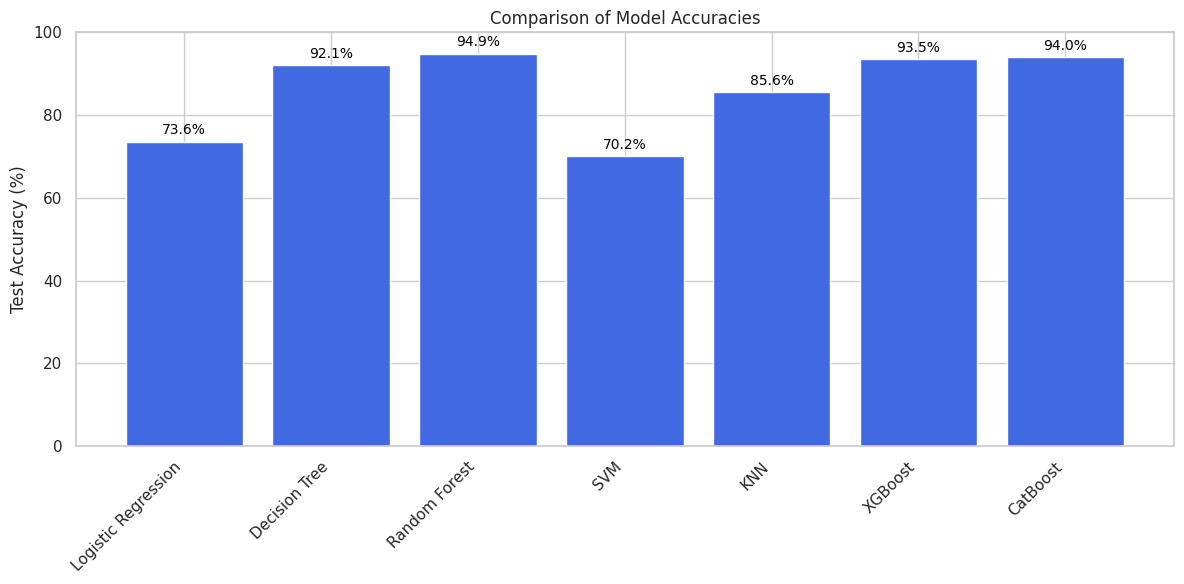

In [ ]:
import matplotlib.pyplot as plt

model_names = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'SVM', 'KNN', 'XGBoost', 'CatBoost'
]

test_accuracies = [
    LR_test_acc * 100,
    DT_test_acc * 100,
    RM_test_acc * 100,
    SVM_test_acc * 100,
    KNN_test_acc * 100,
    XB_test_acc * 100,
    CB_test_acc * 100
]

plt.figure(figsize=(12, 6))

# 🔹 Use same color for all bars (example: skyblue)
bar_color = 'royalblue'  # you can change to 'teal', 'orange', etc.
bars = plt.bar(model_names, test_accuracies, color=bar_color)

plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

# Add text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,
        f'{yval:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


In [ ]:
df3

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_to_income_Ratio,Loan_to_emp_length_ratio,int_rate_to_loan_amnt_ratio
0,23,95000,RENT,2,VENTURE,1,35000,7.90,1,0.37,0,2,0.368421,0.000057,0.000226
1,26,108160,RENT,4,EDUCATION,5,35000,18.39,1,0.32,0,4,0.323595,0.000114,0.000525
2,23,115000,RENT,2,EDUCATION,1,35000,7.90,0,0.30,0,4,0.304348,0.000057,0.000226
3,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,2,30000,10.65,0,0.06,0,3,0.060000,0.000233,0.000355
4,23,120000,RENT,0,EDUCATION,1,35000,7.90,0,0.29,0,4,0.291667,0.0,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,MORTGAGE,1,PERSONAL,3,5800,13.16,0,0.11,0,30,0.109434,0.000172,0.002269
32565,54,120000,MORTGAGE,4,PERSONAL,1,17625,7.49,0,0.15,0,19,0.146875,0.000227,0.000425
32566,65,76000,RENT,3,HOMEIMPROVEMENT,2,35000,10.99,1,0.46,0,28,0.460526,0.000086,0.000314
32567,56,150000,MORTGAGE,5,PERSONAL,2,15000,11.48,0,0.10,0,26,0.100000,0.000333,0.000765


In [ ]:
x1 = df3.drop('loan_status', axis=1)
y1 = df3['loan_status']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[2,4])
],remainder='passthrough')
#STEP-2
SMOTE1 = SMOTE(sampling_strategy='minority',random_state=42)

pipe_smote = Pipeline([
    ('step1',step1),
    ('step2',SMOTE1)
])

X1, Y1 = pipe_smote.fit_resample(x1, y1)


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score

# Step 1: Use sparse encoding + ignore unseen categories
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(
        sparse_output=True,
        drop='first',
        handle_unknown='ignore'   # <-- this fixes your error
    ), [2, 4])
], remainder='passthrough')

# Step 2: Logistic Regression with sparse-friendly solver
LR = LogisticRegression(
    max_iter=500,
    solver='saga',
    n_jobs=-1,
    random_state=42
)

# Build pipeline
pipe = Pipeline([
    ('encode', step1),
    ('model', LR)
])

# Fit and predict
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

# Evaluate
print("Train acc:", pipe.score(x_train, y_train))
print("Test acc:", pipe.score(x_test, y_test))
print("F1:", f1_score(y_test, y_pred, average='weighted'))
print("Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train acc: 0.4980486173059768
Test acc: 0.5078055307760928
F1: 0.3420420628833496
Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67      4554
           1       0.00      0.00      0.00      4414

    accuracy                           0.51      8968
   macro avg       0.25      0.50      0.34      8968
weighted avg       0.26      0.51      0.34      8968



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Step 1: Encode categorical columns safely
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(
        sparse_output=True,
        drop='first',
        handle_unknown='ignore'  # prevents crash if new categories appear
    ), [2, 4])
], remainder='passthrough')

# Step 2: Define Random Forest
RF = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Build pipeline
pipe = Pipeline([
    ('encode', step1),
    ('model', RF)
])

# Fit and predict
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

# Evaluate
train_acc = pipe.score(x_train, y_train)
test_acc = pipe.score(x_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Weighted F1 Score: {f1:.3f}")
print(f"\nClassification Report:\n{report}")


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train Accuracy: 0.869
Test Accuracy: 0.868
Weighted F1 Score: 0.868

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4554
           1       0.87      0.86      0.87      4414

    accuracy                           0.87      8968
   macro avg       0.87      0.87      0.87      8968
weighted avg       0.87      0.87      0.87      8968



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print("Original dataset shape:", df.shape)
print("Original columns:", df.columns.tolist())
df.head()

Original dataset shape: (32569, 12)
Original columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,95000,RENT,2.0,VENTURE,A,35000,7.9,1,0.37,N,2
1,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
2,23,115000,RENT,2.0,EDUCATION,A,35000,7.9,0,0.30,N,4
3,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
4,23,120000,RENT,0.0,EDUCATION,A,35000,7.9,0,0.29,N,4


In [ ]:
import joblib
joblib.dump(pipe, 'loan_rf_pipeline.pkl')


['loan_rf_pipeline.pkl']

In [ ]:
from google.colab import files
files.download('loan_rf_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>